In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
sns.set(color_codes=True)
import glob
import math

In [2]:
import os
import time
import unicodedata
import sklearn
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pandas_datareader import data as pdr
from pylab import rcParams
from tqdm import tqdm_notebook
from xgboost import XGBRegressor
from datetime import date
from matplotlib import pyplot as plt

In [3]:
path = '/Users/kate/CSCE633/apple'
all_files = glob.glob(path + "/*.csv")
li = []
index = ["DATETIME", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME", "NUMBER OF TRADES", "WEIGHTED AV. PRICE"]
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None, names=index)
    li.append(df)

apple = pd.concat(li, axis=0, ignore_index=True, sort=False)

In [4]:
# apple = pd.DataFrame(apple.DATETIME.str.split(' ',1).tolist(),
#                                    columns = ['DATE','TIME'])
apple[['DATE','TIME']] = apple.DATETIME.str.split(expand=True)
apple[["YEAR", "MONTH", "DAY"]] = apple.DATE.str.split(".", expand=True)
apple[["HOUR", "MINUTES", "SECONDS"]] = apple.TIME.str.split(":", expand=True)

In [5]:
apple.loc[:, 'DATE'] = pd.to_datetime(apple['DATE'],format='%Y.%m.%d')
apple = apple.sort_values(['DATETIME'])

In [6]:
apple.head()


,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS
5278,2004.01.23 09:30:00,3.18,3.22,3.20,3.18,31178,1095,3.203286,2004-01-23,09:30:00,2004,01,23,09,30,00
5279,2004.01.23 10:00:00,3.20,3.25,3.23,3.20,46228,1642,3.231714,2004-01-23,10:00:00,2004,01,23,10,00,00
5280,2004.01.23 11:00:00,3.23,3.23,3.23,3.21,32627,1075,3.222429,2004-01-23,11:00:00,2004,01,23,11,00,00
5281,2004.01.23 12:00:00,3.23,3.24,3.22,3.21,40201,1456,3.227571,2004-01-23,12:00:00,2004,01,23,12,00,00
5282,2004.01.23 13:00:00,3.22,3.23,3.21,3.21,14798,778,3.218000,2004-01-23,13:00:00,2004,01,23,13,00,00


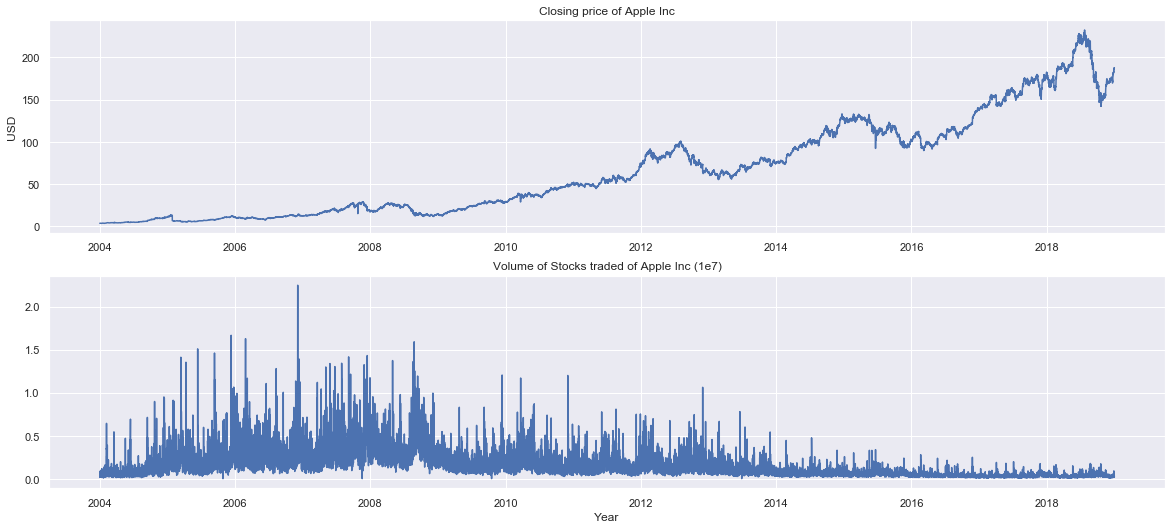

In [7]:
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.notebook_repr_html', True)
# pd.set_option('display.width', 1500)
# pd.set_option('display.max_columns', 100)
fig,ax=plt.subplots(2,1,figsize=(20,5))
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=1.4, wspace=None, hspace=None)
date = np.linspace(2004, 2019, num = 26600)
ax[0].plot(date, apple['CLOSE'])
ax[0].set_title('Closing price of Apple Inc')
ax[0].set_ylabel("USD")

ax[1].plot(date, apple['VOLUME']/1000000)
ax[1].set_title('Volume of Stocks traded of Apple Inc (1e7)')
ax[1].set_xlabel("Year")

plt.show()

Text(0, 0.5, 'USD')

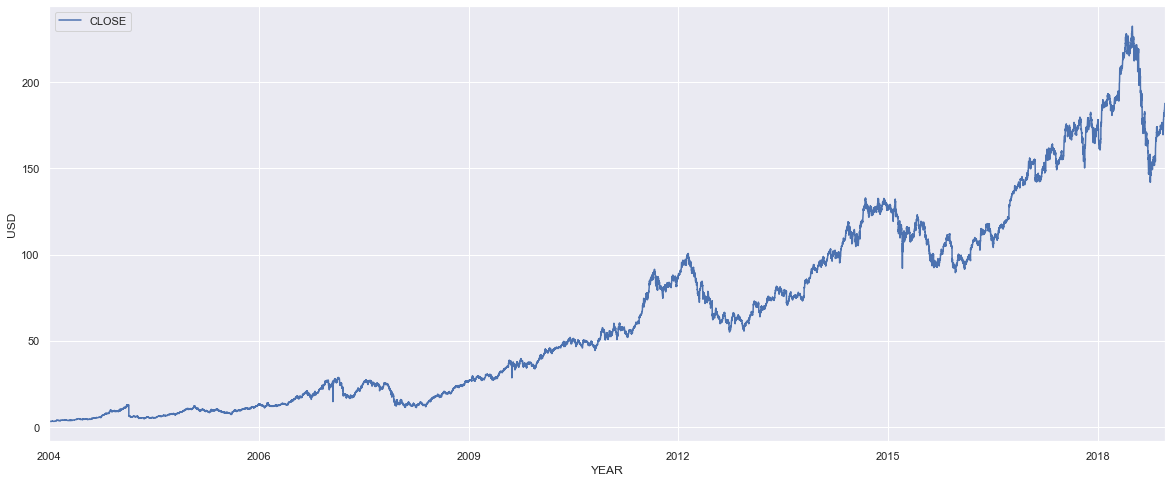

In [8]:
rcParams['figure.figsize'] = 20, 8 # width 10, height 8

ax = apple.plot(x='YEAR', y='CLOSE', style='b-', grid=True)
ax.set_xlabel("YEAR")
ax.set_ylabel("USD")

In [9]:
apple2 = apple
apple.head()

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS
5278,2004.01.23 09:30:00,3.18,3.22,3.20,3.18,31178,1095,3.203286,2004-01-23,09:30:00,2004,01,23,09,30,00
5279,2004.01.23 10:00:00,3.20,3.25,3.23,3.20,46228,1642,3.231714,2004-01-23,10:00:00,2004,01,23,10,00,00
5280,2004.01.23 11:00:00,3.23,3.23,3.23,3.21,32627,1075,3.222429,2004-01-23,11:00:00,2004,01,23,11,00,00
5281,2004.01.23 12:00:00,3.23,3.24,3.22,3.21,40201,1456,3.227571,2004-01-23,12:00:00,2004,01,23,12,00,00
5282,2004.01.23 13:00:00,3.22,3.23,3.21,3.21,14798,778,3.218000,2004-01-23,13:00:00,2004,01,23,13,00,00


Text(0, 0.5, 'USD')

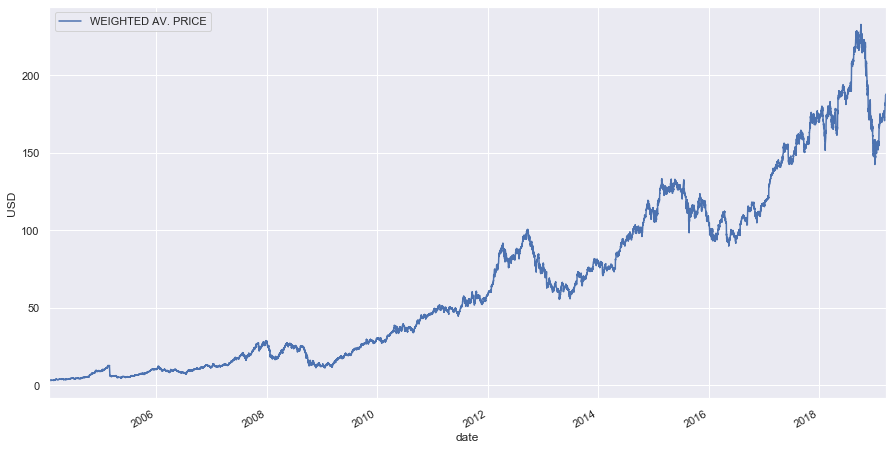

In [10]:
rcParams['figure.figsize'] = 15, 8 # width 10, height 8

ax = apple.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [11]:
# Get difference between high and low of each hour
apple['RANGE_HL'] = apple['HIGH'] - apple['LOW']
#df.drop(['high', 'low'], axis=1, inplace=True)

# Get difference between open and close of each hour
apple['RANGE_OC'] = apple['OPEN'] - apple['CLOSE']
#df.drop(['open', 'close'], axis=1, inplace=True)
apple2 = apple
apple.head(10)

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS,RANGE_HL,RANGE_OC
5278,2004.01.23 09:30:00,3.18,3.22,3.20,3.18,31178,1095,3.203286,2004-01-23,09:30:00,2004,01,23,09,30,00,0.02,0.00
5279,2004.01.23 10:00:00,3.20,3.25,3.23,3.20,46228,1642,3.231714,2004-01-23,10:00:00,2004,01,23,10,00,00,0.02,0.00
5280,2004.01.23 11:00:00,3.23,3.23,3.23,3.21,32627,1075,3.222429,2004-01-23,11:00:00,2004,01,23,11,00,00,0.00,0.02
5281,2004.01.23 12:00:00,3.23,3.24,3.22,3.21,40201,1456,3.227571,2004-01-23,12:00:00,2004,01,23,12,00,00,0.02,0.02
5282,2004.01.23 13:00:00,3.22,3.23,3.21,3.21,14798,778,3.218000,2004-01-23,13:00:00,2004,01,23,13,00,00,0.02,0.01
5283,2004.01.23 14:00:00,3.21,3.22,3.21,3.20,29540,1014,3.213429,2004-01-23,14:00:00,2004,01,23,14,00,00,0.01,0.01
5284,2004.01.23 15:00:00,3.21,3.24,3.23,3.20,74326,2752,3.221429,2004-01-23,15:00:00,2004,01,23,15,00,00,0.01,0.01
5285,2004.01.26 09:30:00,3.21,3.25,3.24,3.20,32641,1093,3.230571,2004-01-26,09:30:00,2004,01,26,09,30,00,0.01,0.01
5286,2004.01.26 10:00:00,3.24,3.25,3.24,3.22,52325,1872,3.235000,2004-01-26,10:00:00,2004,01,26,10,00,00,0.01,0.02
5287,2004.01.26 11:00:00,3.24,3.26,3.25,3.24,42224,1211,3.250286,2004-01-26,11:00:00,2004,01,26,11,00,00,0.01,0.00


In [12]:
 apple.drop(['HIGH', 'LOW', 'OPEN', 'CLOSE', 'DATETIME', 'MONTH', 'DAY', 'MINUTES', 'SECONDS'], axis=1, inplace=True)

In [13]:
apple.head(10)

,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC
5278,31178,1095,3.203286,2004-01-23,09:30:00,2004,09,0.02,0.00
5279,46228,1642,3.231714,2004-01-23,10:00:00,2004,10,0.02,0.00
5280,32627,1075,3.222429,2004-01-23,11:00:00,2004,11,0.00,0.02
5281,40201,1456,3.227571,2004-01-23,12:00:00,2004,12,0.02,0.02
5282,14798,778,3.218000,2004-01-23,13:00:00,2004,13,0.02,0.01
5283,29540,1014,3.213429,2004-01-23,14:00:00,2004,14,0.01,0.01
5284,74326,2752,3.221429,2004-01-23,15:00:00,2004,15,0.01,0.01
5285,32641,1093,3.230571,2004-01-26,09:30:00,2004,09,0.01,0.01
5286,52325,1872,3.235000,2004-01-26,10:00:00,2004,10,0.01,0.02
5287,42224,1211,3.250286,2004-01-26,11:00:00,2004,11,0.01,0.00


In [14]:
apple['ORDER_HOURS'] = [x for x in list(range(len(apple)))]
# merging_keys
merging_keys = ['ORDER_HOURS']

# List of columns that we will use to create lags
lag_cols = ['WEIGHTED AV. PRICE', 'RANGE_HL', 'RANGE_OC', 'VOLUME']
lag_cols

['WEIGHTED AV. PRICE', 'RANGE_HL', 'RANGE_OC', 'VOLUME']

In [15]:
apple.head(10)

,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,ORDER_HOURS
5278,31178,1095,3.203286,2004-01-23,09:30:00,2004,09,0.02,0.00,0
5279,46228,1642,3.231714,2004-01-23,10:00:00,2004,10,0.02,0.00,1
5280,32627,1075,3.222429,2004-01-23,11:00:00,2004,11,0.00,0.02,2
5281,40201,1456,3.227571,2004-01-23,12:00:00,2004,12,0.02,0.02,3
5282,14798,778,3.218000,2004-01-23,13:00:00,2004,13,0.02,0.01,4
5283,29540,1014,3.213429,2004-01-23,14:00:00,2004,14,0.01,0.01,5
5284,74326,2752,3.221429,2004-01-23,15:00:00,2004,15,0.01,0.01,6
5285,32641,1093,3.230571,2004-01-26,09:30:00,2004,09,0.01,0.01,7
5286,52325,1872,3.235000,2004-01-26,10:00:00,2004,10,0.01,0.02,8
5287,42224,1211,3.250286,2004-01-26,11:00:00,2004,11,0.01,0.00,9


In [16]:
N = 7
shift_range = [x+1 for x in range(N)]

for shift in tqdm_notebook(shift_range):
    train_shift = apple[merging_keys + lag_cols].copy()
    
    # E.g. order_day of 0 becomes 1, for shift = 1.
    # So when this is merged with order_day of 1 in df, this will represent lag of 1.
    train_shift['ORDER_HOURS'] = train_shift['ORDER_HOURS'] + shift
    
    foo = lambda x: '{}_lag_{}'.format(x, shift) if x in lag_cols else x
    train_shift = train_shift.rename(columns=foo)

    apple = pd.merge(apple, train_shift, on=merging_keys, how='left') #.fillna(0)
    
    del train_shift

# Remove the first N rows which contain NaNs
apple = apple[N:]
apple.head(10)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,ORDER_HOURS,...,RANGE_OC_lag_5,VOLUME_lag_5,WEIGHTED AV. PRICE_lag_6,RANGE_HL_lag_6,RANGE_OC_lag_6,VOLUME_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_7,RANGE_OC_lag_7,VOLUME_lag_7
7,32641,1093,3.230571,2004-01-26,09:30:00,2004,09,0.01,0.01,7,...,0.02,32627.0,3.231714,0.02,0.00,46228.0,3.203286,0.02,0.00,31178.0
8,52325,1872,3.235000,2004-01-26,10:00:00,2004,10,0.01,0.02,8,...,0.02,40201.0,3.222429,0.00,0.02,32627.0,3.231714,0.02,0.00,46228.0
9,42224,1211,3.250286,2004-01-26,11:00:00,2004,11,0.01,0.00,9,...,0.01,14798.0,3.227571,0.02,0.02,40201.0,3.222429,0.00,0.02,32627.0
10,31941,1175,3.263571,2004-01-26,12:00:00,2004,12,0.03,0.00,10,...,0.01,29540.0,3.218000,0.02,0.01,14798.0,3.227571,0.02,0.02,40201.0
11,27685,888,3.265000,2004-01-26,13:00:00,2004,13,0.00,0.00,11,...,0.01,74326.0,3.213429,0.01,0.01,29540.0,3.218000,0.02,0.01,14798.0
12,40817,1422,3.271714,2004-01-26,14:00:00,2004,14,0.00,0.01,12,...,0.01,32641.0,3.221429,0.01,0.01,74326.0,3.213429,0.01,0.01,29540.0
13,89453,2712,3.285143,2004-01-26,15:00:00,2004,15,0.00,0.00,13,...,0.02,52325.0,3.230571,0.01,0.01,32641.0,3.221429,0.01,0.01,74326.0
14,23891,881,3.288714,2004-01-27,09:30:00,2004,09,0.01,0.01,14,...,0.00,42224.0,3.235000,0.01,0.02,52325.0,3.230571,0.01,0.01,32641.0
15,53935,1521,3.287571,2004-01-27,10:00:00,2004,10,0.03,0.03,15,...,0.00,31941.0,3.250286,0.01,0.00,42224.0,3.235000,0.01,0.02,52325.0
16,41958,1278,3.279857,2004-01-27,11:00:00,2004,11,0.00,0.01,16,...,0.00,27685.0,3.263571,0.03,0.00,31941.0,3.250286,0.01,0.00,42224.0


In [17]:
apple.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26593 entries, 7 to 26599
Data columns (total 38 columns):
VOLUME                      26593 non-null int64
NUMBER OF TRADES            26593 non-null int64
WEIGHTED AV. PRICE          26593 non-null float64
DATE                        26593 non-null datetime64[ns]
TIME                        26593 non-null object
YEAR                        26593 non-null object
HOUR                        26593 non-null object
RANGE_HL                    26593 non-null float64
RANGE_OC                    26593 non-null float64
ORDER_HOURS                 26593 non-null int64
WEIGHTED AV. PRICE_lag_1    26593 non-null float64
RANGE_HL_lag_1              26593 non-null float64
RANGE_OC_lag_1              26593 non-null float64
VOLUME_lag_1                26593 non-null float64
WEIGHTED AV. PRICE_lag_2    26593 non-null float64
RANGE_HL_lag_2              26593 non-null float64
RANGE_OC_lag_2              26593 non-null float64
VOLUME_lag_2              

In [18]:
def get_mov_avg_std(df, col, N):
    """
    Given a dataframe, get mean and std dev at timestep t using values from t-1, t-2, ..., t-N.
    Inputs
        df         : dataframe. Can be of any length.
        col        : name of the column you want to calculate mean and std dev
        N          : get mean and std dev at timestep t using values from t-1, t-2, ..., t-N
    Outputs
        df_out     : same as df but with additional column containing mean and std dev
    """
    mean_list = df[col].rolling(window = N, min_periods=1).mean() # len(mean_list) = len(df)
    std_list = df[col].rolling(window = N, min_periods=1).std()   # first value will be NaN, because normalized by N-1
    
    # Add one timestep to the predictions
    mean_list = np.concatenate((np.array([np.nan]), np.array(mean_list[:-1])))
    std_list = np.concatenate((np.array([np.nan]), np.array(std_list[:-1])))
    
    # Append mean_list to df
    df_out = df.copy()
    df_out[col + '_mean'] = mean_list
    df_out[col + '_std'] = std_list
    
    return df_out

In [19]:
cols_list = [
"WEIGHTED AV. PRICE",
"RANGE_HL",
"RANGE_OC",
"VOLUME"
]

cols_list2 = [
    "OPEN",
    "CLOSE",
    "HIGH",
    "LOW",
    "NUMBER OF TRADES",
    "WEIGHTED AV. PRICE",
    "VOLUME"
]
'''for col in cols_list2:
    apple2 = get_mov_avg_std(apple2, col, N)'''
    
for col in cols_list:
    apple = get_mov_avg_std(apple, col, N)
apple.head()

,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,ORDER_HOURS,...,RANGE_OC_lag_7,VOLUME_lag_7,WEIGHTED AV. PRICE_mean,WEIGHTED AV. PRICE_std,RANGE_HL_mean,RANGE_HL_std,RANGE_OC_mean,RANGE_OC_std,VOLUME_mean,VOLUME_std
7,32641,1093,3.230571,2004-01-26,09:30:00,2004,09,0.01,0.01,7,...,0.00,31178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,52325,1872,3.235000,2004-01-26,10:00:00,2004,10,0.01,0.02,8,...,0.00,46228.0,3.230571,NaN,0.010,NaN,0.0100,NaN,32641.000000,NaN
9,42224,1211,3.250286,2004-01-26,11:00:00,2004,11,0.01,0.00,9,...,0.02,32627.0,3.232786,0.003131,0.010,0.00,0.0150,0.007071,42483.000000,13918.689881
10,31941,1175,3.263571,2004-01-26,12:00:00,2004,12,0.03,0.00,10,...,0.02,40201.0,3.238619,0.010343,0.010,0.00,0.0100,0.010000,42396.666667,9843.135899
11,27685,888,3.265000,2004-01-26,13:00:00,2004,13,0.00,0.00,11,...,0.01,14798.0,3.244857,0.015066,0.015,0.01,0.0075,0.009574,39782.750000,9587.585250


In [20]:
cv_size = 0.2
test_size = 0.2
# Get sizes of each of the datasets
num_cv = int(cv_size*len(apple))
num_test = int(test_size*len(apple))
num_train = len(apple) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = apple[:num_train]
cv = apple[num_train:num_train+num_cv]
train_cv = apple[:num_train+num_cv]
test = apple[num_train+num_cv:]
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 15957
num_cv = 5318
num_test = 5318
train.shape = (15957, 46)
cv.shape = (5318, 46)
train_cv.shape = (21275, 46)
test.shape = (5318, 46)


In [21]:
cols_to_scale = [
"WEIGHTED AV. PRICE"
]
N = 7
for i in range(1,N+1):
    cols_to_scale.append("WEIGHTED AV. PRICE_lag_"+str(i))
    cols_to_scale.append("RANGE_HL_lag_"+str(i))
    cols_to_scale.append("RANGE_OC_lag_"+str(i))
    cols_to_scale.append("VOLUME_lag_"+str(i))

# Do scaling for train set
# Here we only scale the train dataset, and not the entire dataset to prevent information leak
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[cols_to_scale])
print("scaler.mean_ = " + str(scaler.mean_))
print("scaler.var_ = " + str(scaler.var_))
print("train_scaled.shape = " + str(train_scaled.shape))

# Convert the numpy array back into pandas dataframe
train_scaled = pd.DataFrame(train_scaled, columns=cols_to_scale)
train_scaled[['DATE', 'HOUR']] = train.reset_index()[['DATE', 'HOUR']]
print("train_scaled.shape = " + str(train_scaled.shape))
train_scaled.head()

scaler.mean_ = [2.90144929e+01 2.90107608e+01 1.23427336e-01 1.35007207e-01
 2.23624115e+05 2.90070319e+01 1.23419189e-01 1.34987780e-01
 2.23618043e+05 2.90032871e+01 1.23383468e-01 1.34950805e-01
 2.23607017e+05 2.89995313e+01 1.23369681e-01 1.34917591e-01
 2.23599688e+05 2.89957497e+01 1.23322053e-01 1.34868083e-01
 2.23589279e+05 2.89919441e+01 1.23318293e-01 1.34854923e-01
 2.23587257e+05 2.89881258e+01 1.23299492e-01 1.34837375e-01
 2.23585189e+05]
scaler.var_ = [6.03149053e+02 6.03119303e+02 2.78043153e-02 4.79475668e-02
 2.82116627e+10 6.03089803e+02 2.78051043e-02 4.79464011e-02
 2.82134314e+10 6.03059167e+02 2.77921305e-02 4.79338276e-02
 2.82160962e+10 6.03027676e+02 2.77919479e-02 4.79238589e-02
 2.82179274e+10 6.02994428e+02 2.77675000e-02 4.78961238e-02
 2.82201741e+10 6.02959407e+02 2.77680514e-02 4.78969098e-02
 2.82208262e+10 6.02923687e+02 2.77662958e-02 4.78967289e-02
 2.82215536e+10]
train_scaled.shape = (15957, 29)
train_scaled.shape = (15957, 31)


,WEIGHTED AV. PRICE,WEIGHTED AV. PRICE_lag_1,RANGE_HL_lag_1,RANGE_OC_lag_1,VOLUME_lag_1,WEIGHTED AV. PRICE_lag_2,RANGE_HL_lag_2,RANGE_OC_lag_2,VOLUME_lag_2,WEIGHTED AV. PRICE_lag_3,...,WEIGHTED AV. PRICE_lag_6,RANGE_HL_lag_6,RANGE_OC_lag_6,VOLUME_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_7,RANGE_OC_lag_7,VOLUME_lag_7,DATE,HOUR
0,-1.049873,-1.050119,-0.680239,-0.570889,-0.888874,-1.050319,-0.680181,-0.570807,-1.155443,-1.050007,...,-1.049073,-0.620018,-0.616188,-1.055769,-1.050106,-0.619925,-0.616109,-1.145331,2004-01-26,09
1,-1.049692,-1.049747,-0.680239,-0.570889,-1.137053,-1.049993,-0.680181,-0.570807,-0.888810,-1.050193,...,-1.049451,-0.740039,-0.524802,-1.136732,-1.048949,-0.619925,-0.616109,-1.055743,2004-01-26,10
2,-1.049070,-1.049566,-0.680239,-0.525221,-1.019861,-1.049620,-0.680181,-0.570807,-1.136981,-1.049867,...,-1.049242,-0.620018,-0.524802,-1.091646,-1.049327,-0.739950,-0.524723,-1.136705,2004-01-26,11
3,-1.048529,-1.048944,-0.680239,-0.616558,-1.079999,-1.049440,-0.680181,-0.525138,-1.019792,-1.049495,...,-1.049631,-0.620018,-0.570495,-1.242863,-1.049117,-0.619925,-0.524723,-1.091620,2004-01-26,12
4,-1.048471,-1.048403,-0.560296,-0.616558,-1.141220,-1.048818,-0.680181,-0.616476,-1.079929,-1.049314,...,-1.049818,-0.680029,-0.570495,-1.155108,-1.049507,-0.619925,-0.570416,-1.242835,2004-01-26,13


In [22]:
# Do scaling for train+dev set
scaler_train_cv = StandardScaler()
train_cv_scaled = scaler_train_cv.fit_transform(train_cv[cols_to_scale])
print("scaler_train_cv.mean_ = " + str(scaler_train_cv.mean_))
print("scaler_train_cv.var_ = " + str(scaler_train_cv.var_))
print("train_cv_scaled.shape = " + str(train_cv_scaled.shape))

# Convert the numpy array back into pandas dataframe
train_cv_scaled = pd.DataFrame(train_cv_scaled, columns=cols_to_scale)
train_cv_scaled[['DATE', 'HOUR']] = train_cv.reset_index()[['DATE', 'HOUR']]
print("train_cv_scaled.shape = " + str(train_cv_scaled.shape))
train_cv_scaled.head()

scaler_train_cv.mean_ = [4.54513920e+01 4.54467756e+01 1.70052644e-01 1.84103878e-01
 1.87994983e+05 4.54421561e+01 1.70038073e-01 1.84093067e-01
 1.87995113e+05 4.54375483e+01 1.70036193e-01 1.84090247e-01
 1.87993805e+05 4.54329562e+01 1.70019741e-01 1.84080846e-01
 1.87993647e+05 4.54283712e+01 1.70009871e-01 1.84063925e-01
 1.87993258e+05 4.54237494e+01 1.70008461e-01 1.84047474e-01
 1.87992622e+05 4.54191300e+01 1.69987309e-01 1.84028672e-01
 1.87992312e+05]
scaler_train_cv.var_ = [1.39228470e+03 1.39222118e+03 5.52437481e-02 7.91000701e-02
 2.57901486e+10 1.39215735e+03 5.52438951e-02 7.91013479e-02
 2.57901072e+10 1.39209474e+03 5.52443841e-02 7.91021606e-02
 2.57905239e+10 1.39203375e+03 5.52435625e-02 7.91033655e-02
 2.57905701e+10 1.39197355e+03 5.52448460e-02 7.91028265e-02
 2.57906877e+10 1.39190913e+03 5.52452267e-02 7.91031244e-02
 2.57908593e+10 1.39184518e+03 5.52420539e-02 7.91025242e-02
 2.57909546e+10]
train_cv_scaled.shape = (21275, 29)
train_cv_scaled.shape = (2127

,WEIGHTED AV. PRICE,WEIGHTED AV. PRICE_lag_1,RANGE_HL_lag_1,RANGE_OC_lag_1,VOLUME_lag_1,WEIGHTED AV. PRICE_lag_2,RANGE_HL_lag_2,RANGE_OC_lag_2,VOLUME_lag_2,WEIGHTED AV. PRICE_lag_3,...,WEIGHTED AV. PRICE_lag_6,RANGE_HL_lag_6,RANGE_OC_lag_6,VOLUME_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_7,RANGE_OC_lag_7,VOLUME_lag_7,DATE,HOUR
0,-1.131521,-1.131668,-0.680960,-0.619042,-0.707807,-1.131785,-0.680897,-0.618998,-0.986688,-1.131564,...,-1.130902,-0.638217,-0.654385,-0.882744,-1.131566,-0.638145,-0.654320,-0.976454,2004-01-26,09
1,-1.131402,-1.131423,-0.680960,-0.619042,-0.967376,-1.131570,-0.680897,-0.618998,-0.707809,-1.131687,...,-1.131151,-0.723308,-0.583274,-0.967436,-1.130804,-0.638145,-0.654320,-0.882741,2004-01-26,10
2,-1.130993,-1.131304,-0.680960,-0.583486,-0.844806,-1.131325,-0.680897,-0.618998,-0.967378,-1.131472,...,-1.131013,-0.638217,-0.583274,-0.920273,-1.131053,-0.723239,-0.583210,-0.967432,2004-01-26,11
3,-1.130637,-1.130895,-0.680960,-0.654598,-0.907704,-1.131207,-0.680897,-0.583443,-0.844807,-1.131227,...,-1.131270,-0.638217,-0.618829,-1.078454,-1.130915,-0.638145,-0.583210,-0.920270,2004-01-26,12
4,-1.130598,-1.130539,-0.595868,-0.654598,-0.971735,-1.130797,-0.680897,-0.654554,-0.907705,-1.131109,...,-1.131392,-0.680762,-0.618829,-0.986658,-1.131172,-0.638145,-0.618765,-1.078450,2004-01-26,13


In [23]:
def scale_row(row, feat_mean, feat_std):
    """
    Given a pandas series in row, scale it to have 0 mean and var 1 using feat_mean and feat_std
    Inputs
        row      : pandas series. Need to scale this.
        feat_mean: mean  
        feat_std : standard deviation
    Outputs
        row_scaled : pandas series with same length as row, but scaled
    """
    # If feat_std = 0 (this happens if adj_close doesn't change over N days), 
    # set it to a small number to avoid division by zero
    feat_std = 0.001 if feat_std == 0 else feat_std
    
    row_scaled = (row-feat_mean) / feat_std
    
    return row_scaled

In [24]:
# Do scaling for dev set
cv_scaled = cv[['DATE']]
for col in tqdm_notebook(cols_list):
    feat_list = [col + '_lag_' + str(shift) for shift in range(1, N+1)]
    temp = cv.apply(lambda row: scale_row(row[feat_list], row[col+'_mean'], row[col+'_std']), axis=1)
    cv_scaled = pd.concat([cv_scaled, temp], axis=1)
    
# Now the entire dev set is scaled
cv_scaled.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


,DATE,WEIGHTED AV. PRICE_lag_1,WEIGHTED AV. PRICE_lag_2,WEIGHTED AV. PRICE_lag_3,WEIGHTED AV. PRICE_lag_4,WEIGHTED AV. PRICE_lag_5,WEIGHTED AV. PRICE_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_1,RANGE_HL_lag_2,...,RANGE_OC_lag_5,RANGE_OC_lag_6,RANGE_OC_lag_7,VOLUME_lag_1,VOLUME_lag_2,VOLUME_lag_3,VOLUME_lag_4,VOLUME_lag_5,VOLUME_lag_6,VOLUME_lag_7
15964,2013-02-26,-0.969602,-1.074268,-0.620378,-0.291786,0.421757,1.114417,1.419862,-0.806302,-0.691116,...,1.624692,-0.847665,-0.559224,-0.896303,-0.020159,1.125864,0.527212,1.268228,-0.874717,-1.130124
15965,2013-02-26,0.378990,-0.989946,-1.122290,-0.548374,-0.132890,0.769342,1.645168,-0.357487,-0.736640,...,0.600066,1.558067,-0.652704,0.742448,-1.305865,-0.350992,0.898013,0.245566,1.053170,-1.282340
15966,2013-02-26,1.727169,0.327136,-0.961768,-1.086375,-0.546012,-0.154817,0.694667,-0.958455,-0.328311,...,0.798146,0.622453,1.536054,1.084320,0.382306,-1.798891,-0.782071,0.547963,-0.146812,0.713185
15967,2013-02-27,1.469406,1.229732,0.109497,-0.921820,-1.021524,-0.589152,-0.276138,0.725818,-1.092548,...,-0.025957,1.245957,1.018829,0.823651,1.043665,0.354629,-1.786242,-0.788221,0.517223,-0.164706
15968,2013-02-27,0.558441,1.296821,1.062786,-0.031093,-1.038145,-1.135504,-0.713305,1.101879,0.447430,...,-0.829887,-0.098658,1.038809,-0.546947,0.865900,1.079985,0.409519,-1.673656,-0.702531,0.567731


In [25]:
cv_scaled.tail()

,DATE,WEIGHTED AV. PRICE_lag_1,WEIGHTED AV. PRICE_lag_2,WEIGHTED AV. PRICE_lag_3,WEIGHTED AV. PRICE_lag_4,WEIGHTED AV. PRICE_lag_5,WEIGHTED AV. PRICE_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_1,RANGE_HL_lag_2,...,RANGE_OC_lag_5,RANGE_OC_lag_6,RANGE_OC_lag_7,VOLUME_lag_1,VOLUME_lag_2,VOLUME_lag_3,VOLUME_lag_4,VOLUME_lag_5,VOLUME_lag_6,VOLUME_lag_7
21277,2016-03-08,-1.011134,-1.246161,-0.595316,0.420122,0.555715,0.296582,1.580192,-1.167443,0.548698,...,-0.882042,-0.058803,0.147007,1.031510,-0.415912,-0.617415,-1.706903,0.029134,1.008513,0.671072
21278,2016-03-08,-1.939902,-0.216650,-0.386364,0.083614,0.816866,0.914778,0.727657,-0.299288,-1.380585,...,-1.369306,-0.890049,-0.068465,-0.088477,1.210797,-0.303334,-0.514125,-1.653825,0.162223,1.186740
21279,2016-03-08,-1.151544,-1.462260,0.105174,-0.049194,0.378288,1.045239,1.134298,0.623550,-0.418803,...,1.796810,-1.185524,-0.731691,0.292002,0.078544,1.590560,-0.171493,-0.416798,-1.743111,0.370295
21280,2016-03-08,-0.313030,-1.048714,-1.404106,0.388700,0.212136,0.701083,1.463931,-1.068160,0.714846,...,0.490194,1.652428,-0.893418,0.240711,0.316386,0.101246,1.625173,-0.150761,-0.397998,-1.734759
21281,2016-03-08,0.522841,-0.175104,-1.112429,-1.565228,0.718958,0.494001,1.116961,0.287640,-1.252081,...,0.151099,0.444902,1.678875,-1.394844,0.173205,0.265845,0.002474,1.868040,-0.306028,-0.608692


In [26]:
# Do scaling for test set
test_scaled = test[['DATE']]
for col in tqdm_notebook(cols_list):
    feat_list = [col + '_lag_' + str(shift) for shift in range(1, N+1)]
    temp = test.apply(lambda row: scale_row(row[feat_list], row[col+'_mean'], row[col+'_std']), axis=1)
    test_scaled = pd.concat([test_scaled, temp], axis=1)
    
# Now the entire test set is scaled
test_scaled.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


,DATE,WEIGHTED AV. PRICE_lag_1,WEIGHTED AV. PRICE_lag_2,WEIGHTED AV. PRICE_lag_3,WEIGHTED AV. PRICE_lag_4,WEIGHTED AV. PRICE_lag_5,WEIGHTED AV. PRICE_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_1,RANGE_HL_lag_2,...,RANGE_OC_lag_5,RANGE_OC_lag_6,RANGE_OC_lag_7,VOLUME_lag_1,VOLUME_lag_2,VOLUME_lag_3,VOLUME_lag_4,VOLUME_lag_5,VOLUME_lag_6,VOLUME_lag_7
21282,2016-03-08,0.527209,0.704481,-0.075513,-1.123025,-1.629054,0.923652,0.672250,-0.518291,0.545099,...,0.823923,0.565678,0.996086,-1.357052,-1.018312,0.285856,0.362906,0.143857,1.695474,-0.112729
21283,2016-03-08,-0.025068,0.673473,0.859075,0.042423,-1.054320,-1.584131,1.088548,1.187605,-0.503223,...,-0.572232,0.514038,0.310363,-0.491503,-1.262883,-0.931786,0.342960,0.418271,0.204164,1.720776
21284,2016-03-09,-0.051643,0.186792,0.982856,1.194370,0.263706,-0.986152,-1.589930,1.290628,0.743089,...,-1.594197,-0.579708,0.502414,1.691200,-0.491254,-1.280272,-0.941604,0.362288,0.439322,0.220319
21285,2016-03-09,-1.514821,-0.077977,0.170862,1.001663,1.222407,0.251132,-1.053265,1.950698,0.306392,...,-0.502326,-1.022123,-0.563478,0.527435,1.600619,-0.532077,-1.303106,-0.972159,0.302005,0.377283
21286,2016-03-09,-0.986867,-1.554038,-0.093266,0.159717,1.004354,1.228774,0.241325,0.460146,1.825578,...,-0.129319,-0.383916,-0.864822,0.394408,0.523800,1.595565,-0.534310,-1.304320,-0.973811,0.298669


In [27]:
test_scaled.tail()

,DATE,WEIGHTED AV. PRICE_lag_1,WEIGHTED AV. PRICE_lag_2,WEIGHTED AV. PRICE_lag_3,WEIGHTED AV. PRICE_lag_4,WEIGHTED AV. PRICE_lag_5,WEIGHTED AV. PRICE_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_1,RANGE_HL_lag_2,...,RANGE_OC_lag_5,RANGE_OC_lag_6,RANGE_OC_lag_7,VOLUME_lag_1,VOLUME_lag_2,VOLUME_lag_3,VOLUME_lag_4,VOLUME_lag_5,VOLUME_lag_6,VOLUME_lag_7
26595,2019-03-18,1.928268,0.013650,-0.568668,0.316528,-0.038632,-0.328890,-1.322256,-0.454640,-0.060118,...,-0.594304,-0.368210,-0.368210,0.836940,0.125172,1.614449,-0.979900,-1.201062,-0.511181,0.115581
26596,2019-03-18,1.018527,1.708497,-0.397101,-1.037504,-0.064012,-0.454598,-0.773809,0.624875,-0.666282,...,0.149990,-0.763840,-0.569408,-0.409910,0.911514,0.210560,1.677212,-0.877724,-1.095526,-0.416126
26597,2019-03-18,0.496863,0.840551,1.556740,-0.628870,-1.293608,-0.283124,-0.688552,-0.348631,0.727252,...,1.478063,0.034374,-0.908035,-1.049625,-0.257240,0.934357,0.302270,1.624827,-0.679093,-0.875497
26598,2019-03-18,0.908651,0.215995,0.546491,1.235189,-0.866526,-1.505748,-0.534052,-0.959407,-0.318582,...,-0.987983,1.487821,0.014615,-1.147313,-0.926700,-0.185762,0.928470,0.337421,1.574110,-0.580225
26599,2019-03-18,0.944429,0.609343,-0.038613,0.270555,0.914808,-1.051275,-1.649246,-0.342667,-1.062268,...,-0.908621,-0.949393,1.517281,-0.738151,-1.093749,-0.877966,-0.153255,0.936575,0.358470,1.568076


In [142]:
features = []
for i in range(1,N+1):
    features.append("WEIGHTED AV. PRICE_lag_"+str(i))
    features.append("RANGE_HL_lag_"+str(i))
    features.append("RANGE_OC_lag_"+str(i))
    features.append("VOLUME_lag_"+str(i))
    

target = "WEIGHTED AV. PRICE"


# Split into X and y
X_train = train[features]
y_train = train[target]
X_cv = cv[features]
y_cv = cv[target]
X_train_cv = train_cv[features]
y_train_cv = train_cv[target]
X_sample = test[features]
y_sample = test[target]
print("X_train.shape = " + str(X_train.shape))
print("y_train.shape = " + str(y_train.shape))
print("X_cv.shape = " + str(X_cv.shape))
print("y_cv.shape = " + str(y_cv.shape))
print("X_train_cv.shape = " + str(X_train_cv.shape))
print("y_train_cv.shape = " + str(y_train_cv.shape))
print("X_sample.shape = " + str(X_sample.shape))
print("y_sample.shape = " + str(y_sample.shape))


X_train.shape = (15957, 28)
y_train.shape = (15957,)
X_cv.shape = (5318, 28)
y_cv.shape = (5318,)
X_train_cv.shape = (21275, 28)
y_train_cv.shape = (21275,)
X_sample.shape = (5318, 28)
y_sample.shape = (5318,)


In [150]:
print(y_train_cv.shape)

(21275,)


In [151]:
# Split into X and y
X_train_scaled = train_scaled[features]
y_train_scaled = train_scaled[target]
X_cv_scaled = cv_scaled[features]
X_train_cv_scaled = train_cv_scaled[features]
y_train_cv_scaled = train_cv_scaled[target]
new_x = X_train_cv_scaled[15957:21275]
new_y = y_train_cv[15957:21275] 
X_sample_scaled = test_scaled[features]
print("X_train_scaled.shape = " + str(X_train_scaled.shape))
print("y_train_scaled.shape = " + str(y_train_scaled.shape))
print("X_cv_scaled.shape = " + str(X_cv_scaled.shape))
print("X_train_cv_scaled.shape = " + str(X_train_cv_scaled.shape))
print("y_train_cv_scaled.shape = " + str(y_train_cv_scaled.shape))
print("X_sample_scaled.shape = " + str(X_sample_scaled.shape))

X_train_scaled.shape = (15957, 28)
y_train_scaled.shape = (15957,)
X_cv_scaled.shape = (5318, 28)
X_train_cv_scaled.shape = (21275, 28)
y_train_cv_scaled.shape = (21275,)
X_sample_scaled.shape = (5318, 28)


In [148]:
print(new_y)

Empty DataFrame
Columns: [VOLUME, NUMBER OF TRADES, WEIGHTED AV. PRICE, DATE, TIME, YEAR, HOUR, RANGE_HL, RANGE_OC, ORDER_HOURS, WEIGHTED AV. PRICE_lag_1, RANGE_HL_lag_1, RANGE_OC_lag_1, VOLUME_lag_1, WEIGHTED AV. PRICE_lag_2, RANGE_HL_lag_2, RANGE_OC_lag_2, VOLUME_lag_2, WEIGHTED AV. PRICE_lag_3, RANGE_HL_lag_3, RANGE_OC_lag_3, VOLUME_lag_3, WEIGHTED AV. PRICE_lag_4, RANGE_HL_lag_4, RANGE_OC_lag_4, VOLUME_lag_4, WEIGHTED AV. PRICE_lag_5, RANGE_HL_lag_5, RANGE_OC_lag_5, VOLUME_lag_5, WEIGHTED AV. PRICE_lag_6, RANGE_HL_lag_6, RANGE_OC_lag_6, VOLUME_lag_6, WEIGHTED AV. PRICE_lag_7, RANGE_HL_lag_7, RANGE_OC_lag_7, VOLUME_lag_7, WEIGHTED AV. PRICE_mean, WEIGHTED AV. PRICE_std, RANGE_HL_mean, RANGE_HL_std, RANGE_OC_mean, RANGE_OC_std, VOLUME_mean, VOLUME_std, est_scaled, est]
Index: []

[0 rows x 48 columns]


Text(0.5, 1.0, 'Without scaling')

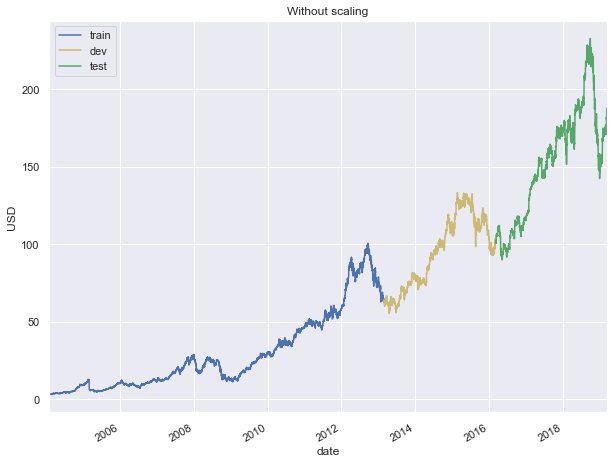

In [30]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='y-', grid=True, ax=ax)
ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_title("Without scaling")

Text(0.5, 1.0, 'With scaling')

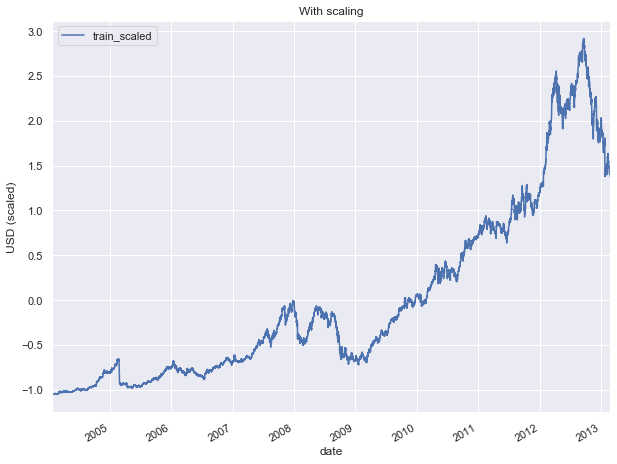

In [31]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train_scaled.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
ax.legend(['train_scaled'])
ax.set_xlabel("date")
ax.set_ylabel("USD (scaled)")
ax.set_title("With scaling")

REGRESSION

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [33]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#results = []
rmse1 = []
mape1 = []


1. First we are going to see if a polynomial model will model the data well enough. 

1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.508568785660916
0.3206231312797162
2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2.7121591026103347
1.9507989721705774
3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2453.871727292198
1345.0107062704158
4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


12.155275367270642
7.8485322028826285


NameError: name 'rmse' is not defined

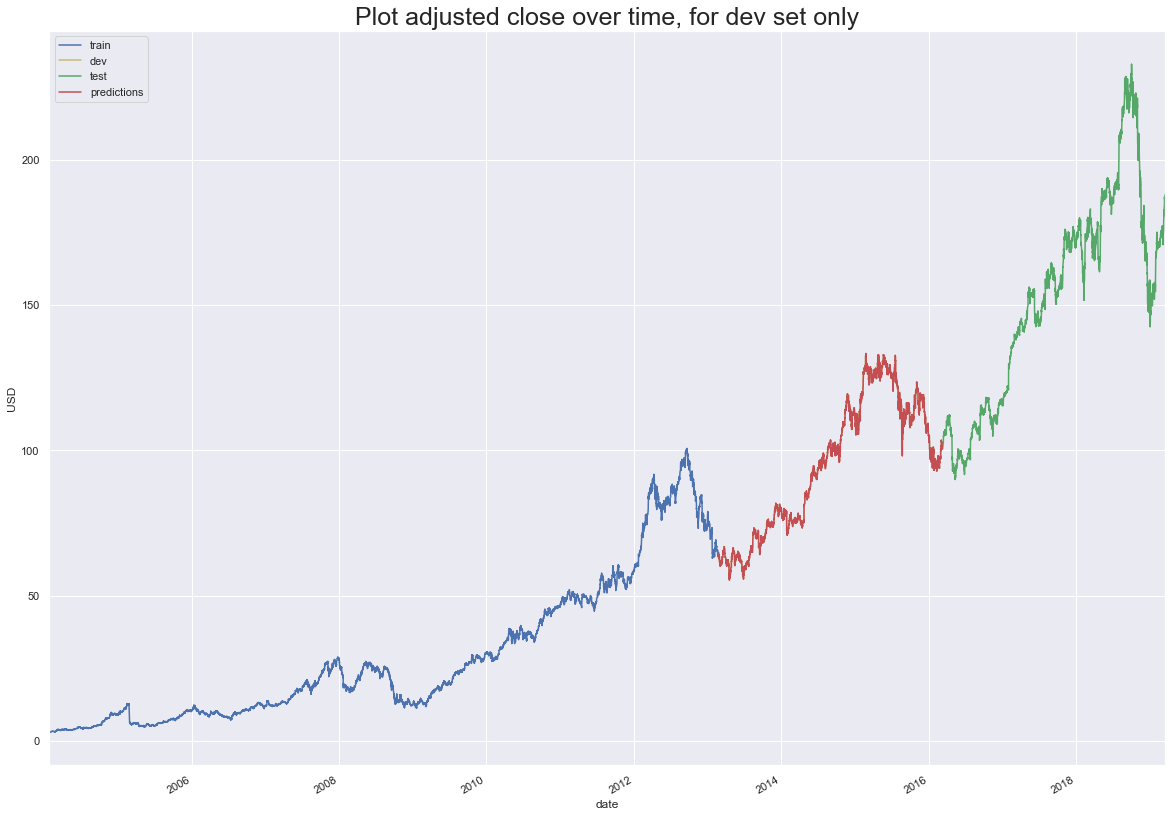

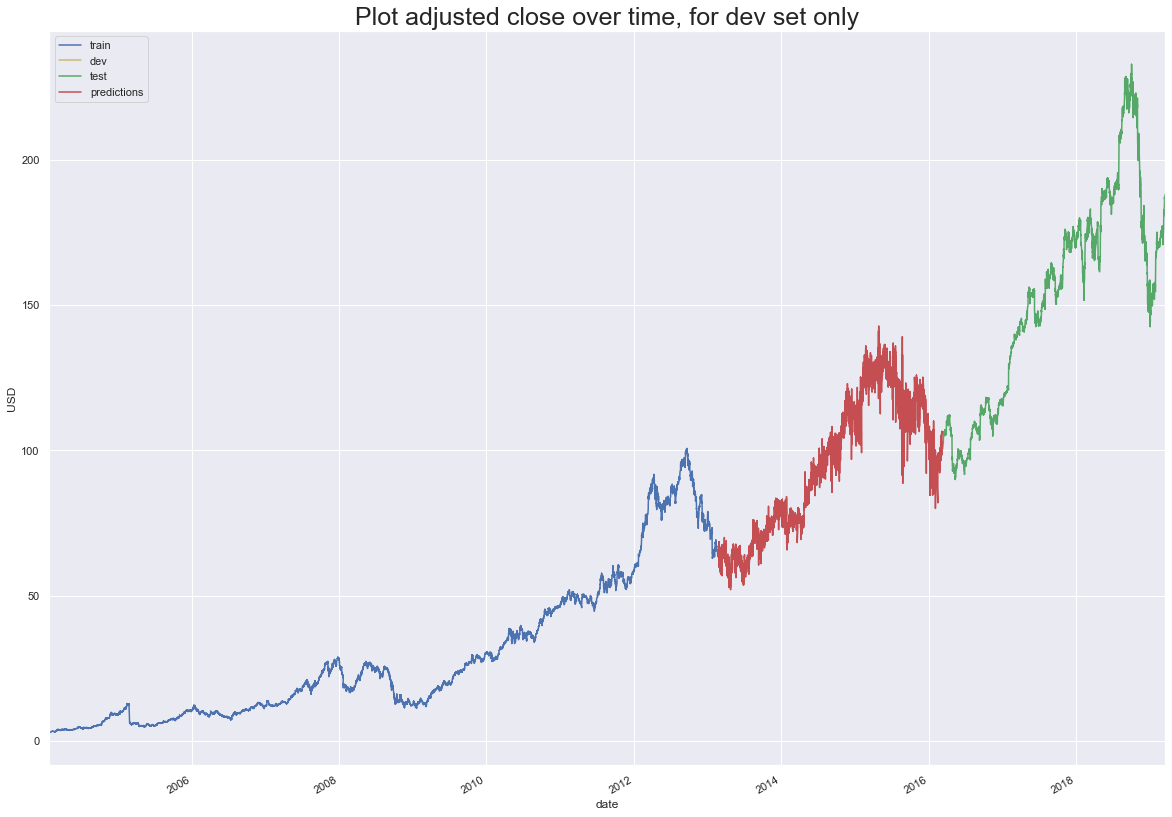

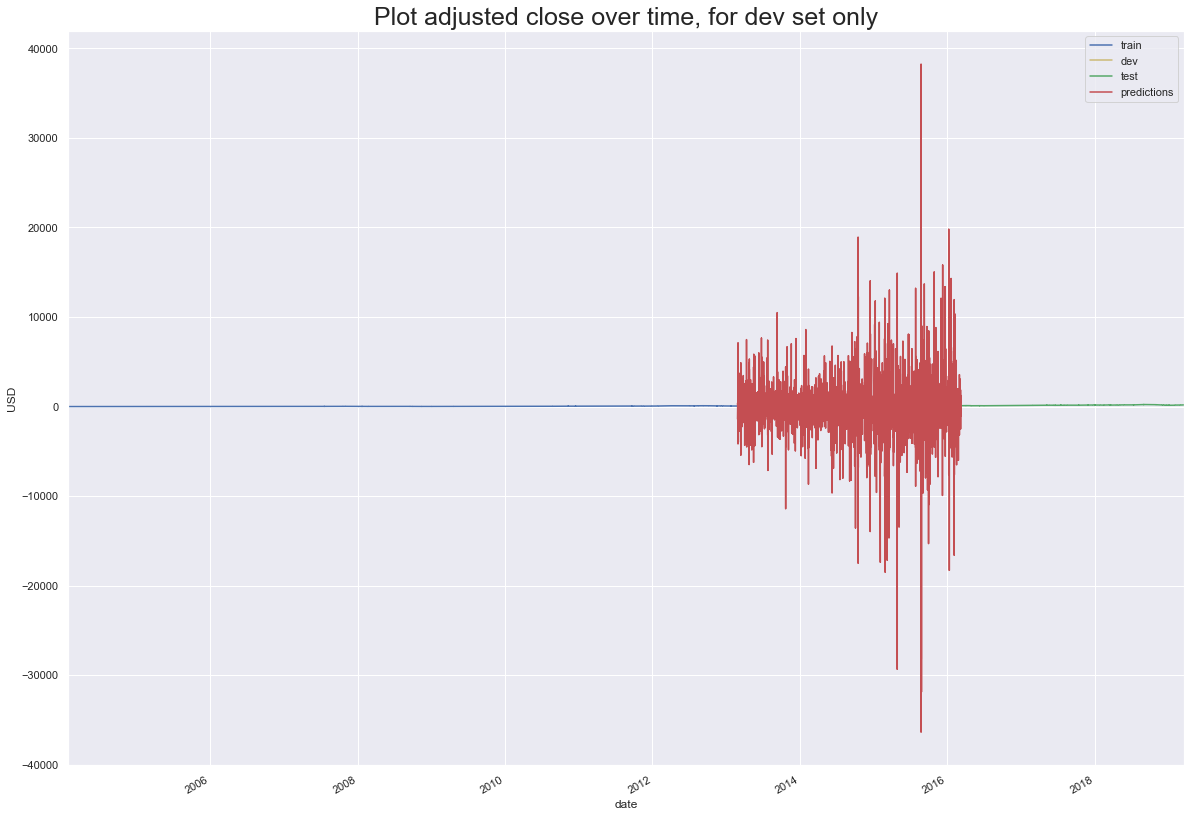

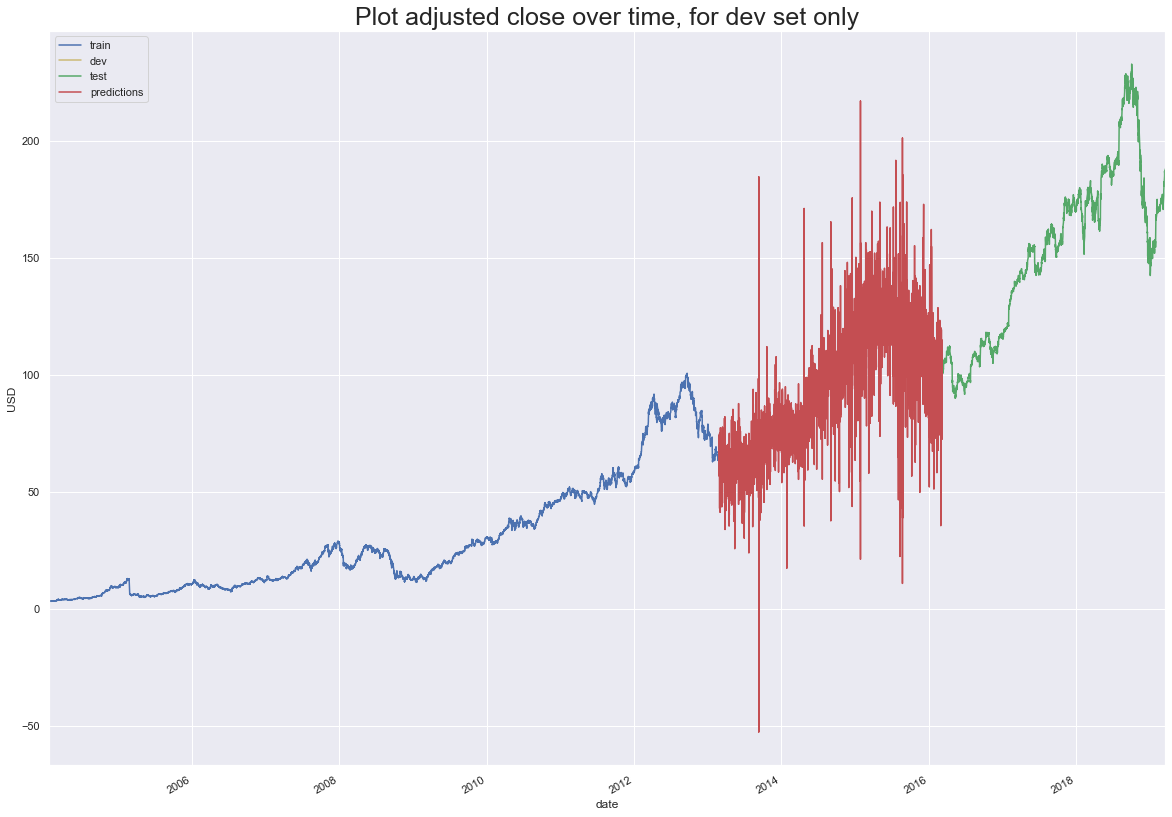

In [35]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
i = 1
rmse_lin = []
mape_lin = []
acc_lin = []
r2_lin = []
results_lin = []
while i <= 4:
    print(i)
    polynomial_features = PolynomialFeatures(degree=i,
                                                 include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
    model = pipeline.fit(X_train_scaled, y_train_scaled)
    est_scaled = model.predict(X_cv_scaled)
    cv['est_scaled'] = est_scaled
    cv['est'] = cv['est_scaled'] * cv['WEIGHTED AV. PRICE_std'] + cv['WEIGHTED AV. PRICE_mean']

    results_lin.append(est_scaled)
    a = math.sqrt(mean_squared_error(y_cv, cv['est']))
    print(a)
    rmse_lin.append(a)
    b = get_mape(y_cv, cv['est'])
    print(b)
    mape_lin.append(b)
    acc = model.score( X_sample, cv['est'].values.reshape(-1,1))
    acc_lin.append(acc)
    r2 = r2_score(y_sample, cv['est'])
    r2_lin.append(r2)
    
    rcParams['figure.figsize'] = 20, 15 # width 10, height 8

    est_df = pd.DataFrame({'est': cv['est'], 
                           'DATE': cv['DATE']})

    ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
    ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='y-', grid=True, ax=ax)
    ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
    ax = est_df.plot(x='DATE', y='est', style='r-', grid=True, ax=ax)
    ax.legend(['train', 'dev', 'test', 'predictions'])
    ax.set_title('Plot adjusted close over time, for dev set only', fontsize=25)
    ax.set_xlabel("date")
    ax.set_ylabel("USD")
    
    i = i+1

print(rmse)
print(mape)
plt.show()

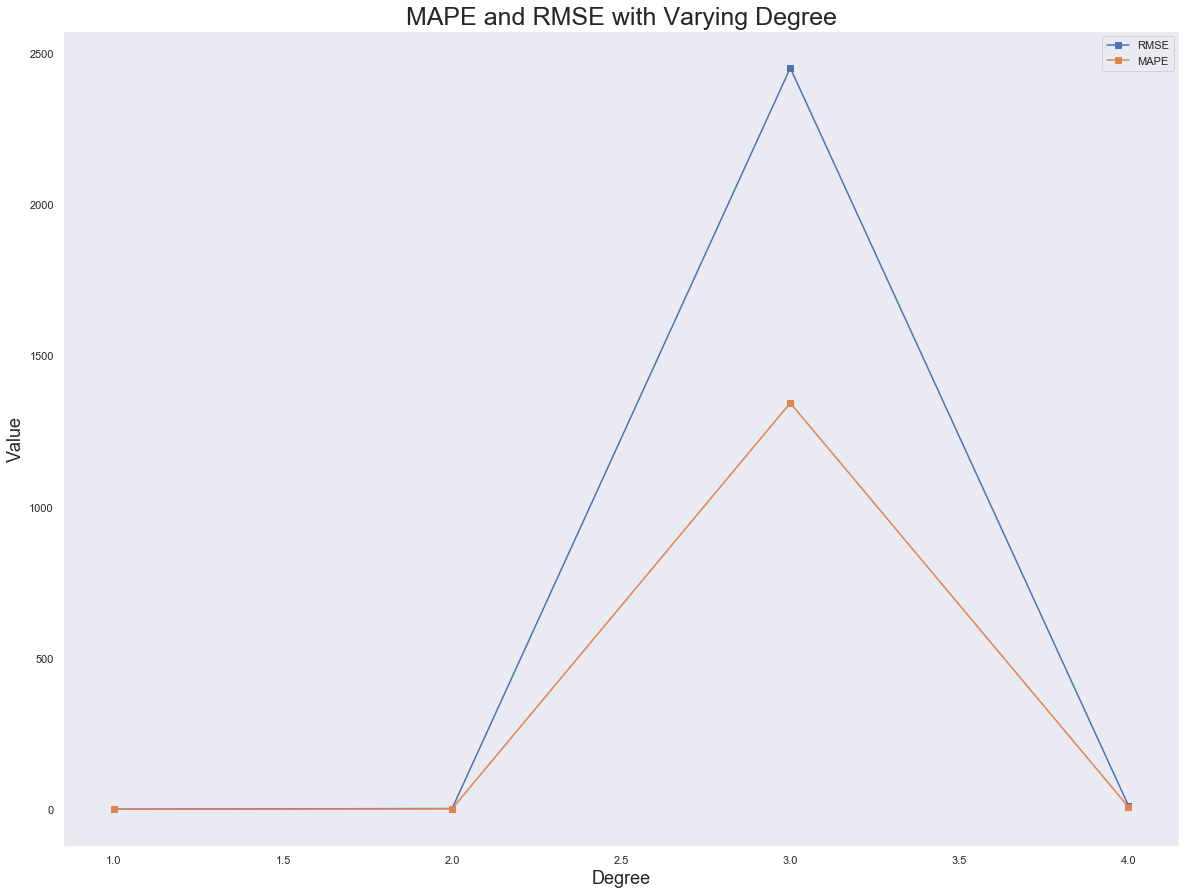

In [37]:
x = [1,2,3,4]
y1 = rmse_lin
y2 = mape_lin
y3 = acc_lin
y4 = r2_lin

plt.plot(x, y1, label='RMSE', marker='s')
plt.plot(x, y2, label='MAPE', marker='s')
#plt.plot(x, y3, label='Accuracy', marker='s')
#plt.plot(x, y4, label='R^2', marker='s')
plt.title("MAPE and RMSE with Varying Degree", fontsize=25)
plt.xlabel('Degree', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.grid()
plt.legend()

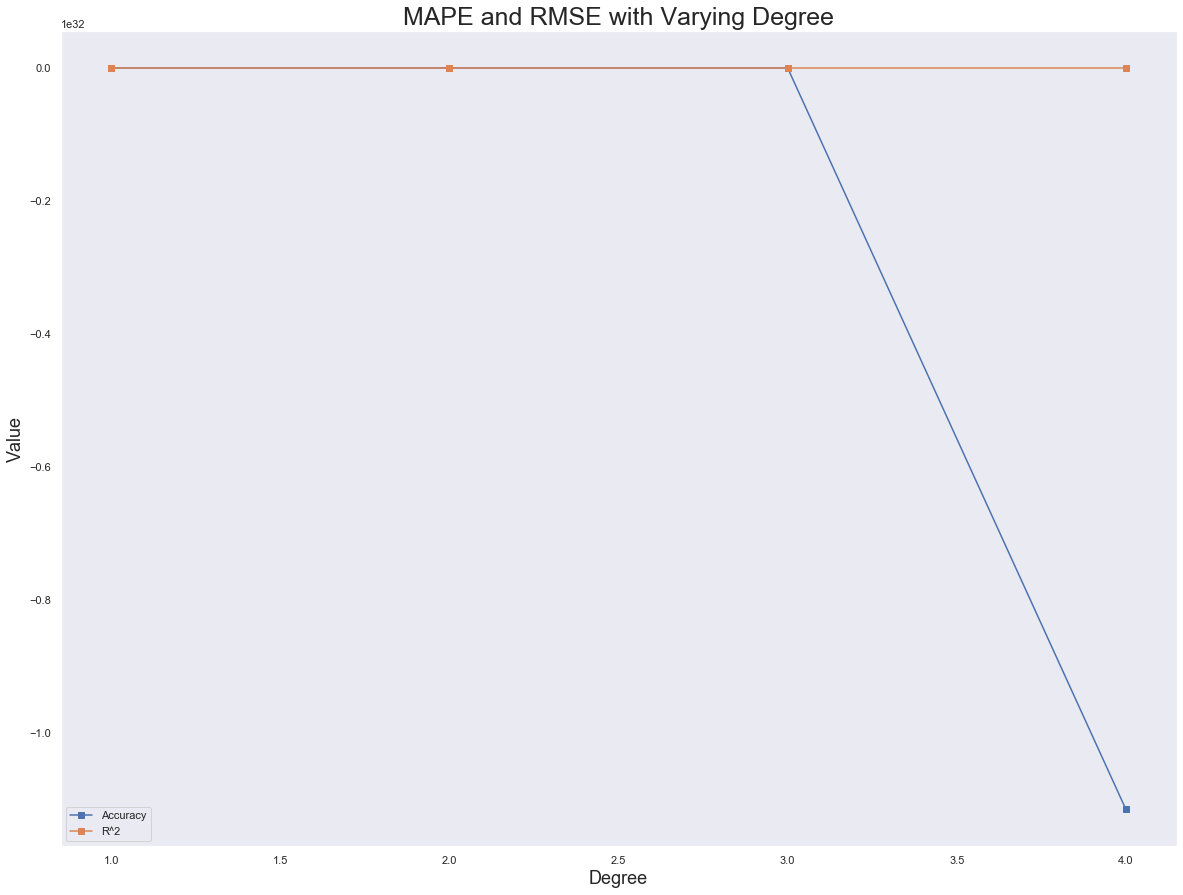

In [39]:
x = [1,2,3,4]
y1 = rmse_lin
y2 = mape_lin
y3 = acc_lin
y4 = r2_lin

#plt.plot(x, y1, label='RMSE', marker='s')
#plt.plot(x, y2, label='MAPE', marker='s')
plt.plot(x, y3, label='Accuracy', marker='s')
plt.plot(x, y4, label='R^2', marker='s')
plt.title("MAPE and RMSE with Varying Degree", fontsize=25)
plt.xlabel('Degree', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.grid()
plt.legend()
plt.show()

(5318, 28)
1
0.7754261380087561
0.2827366355226306


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4.14387784628369
1.7626834526386743
3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3823.975828606146
1250.279041632338
4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


19.069569326578584
7.041192134009602


NameError: name 'rmse' is not defined

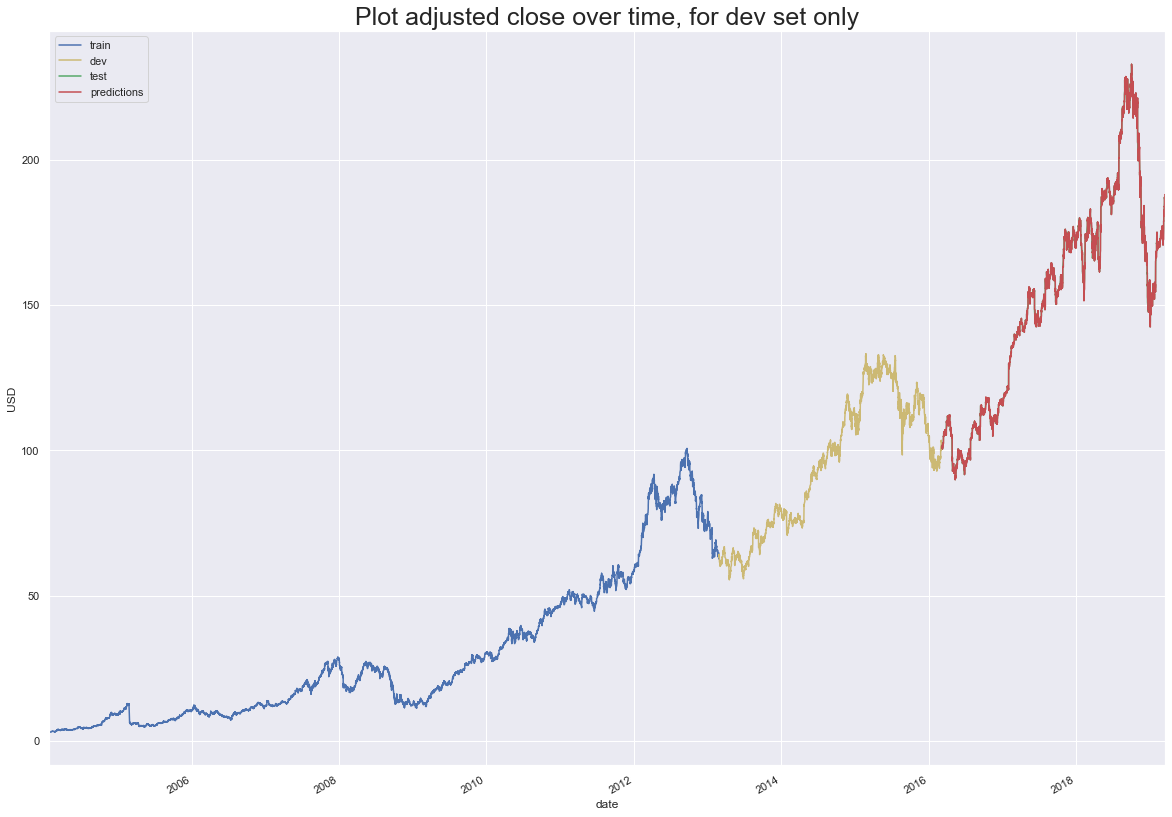

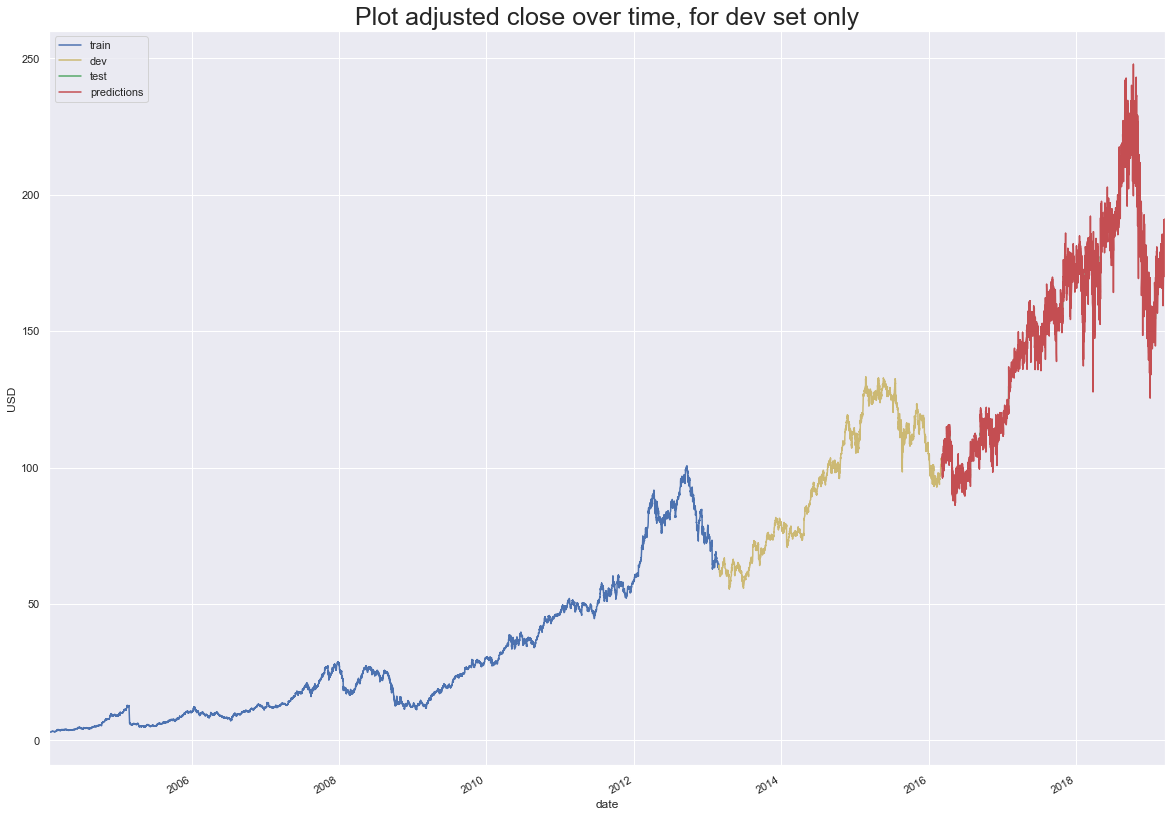

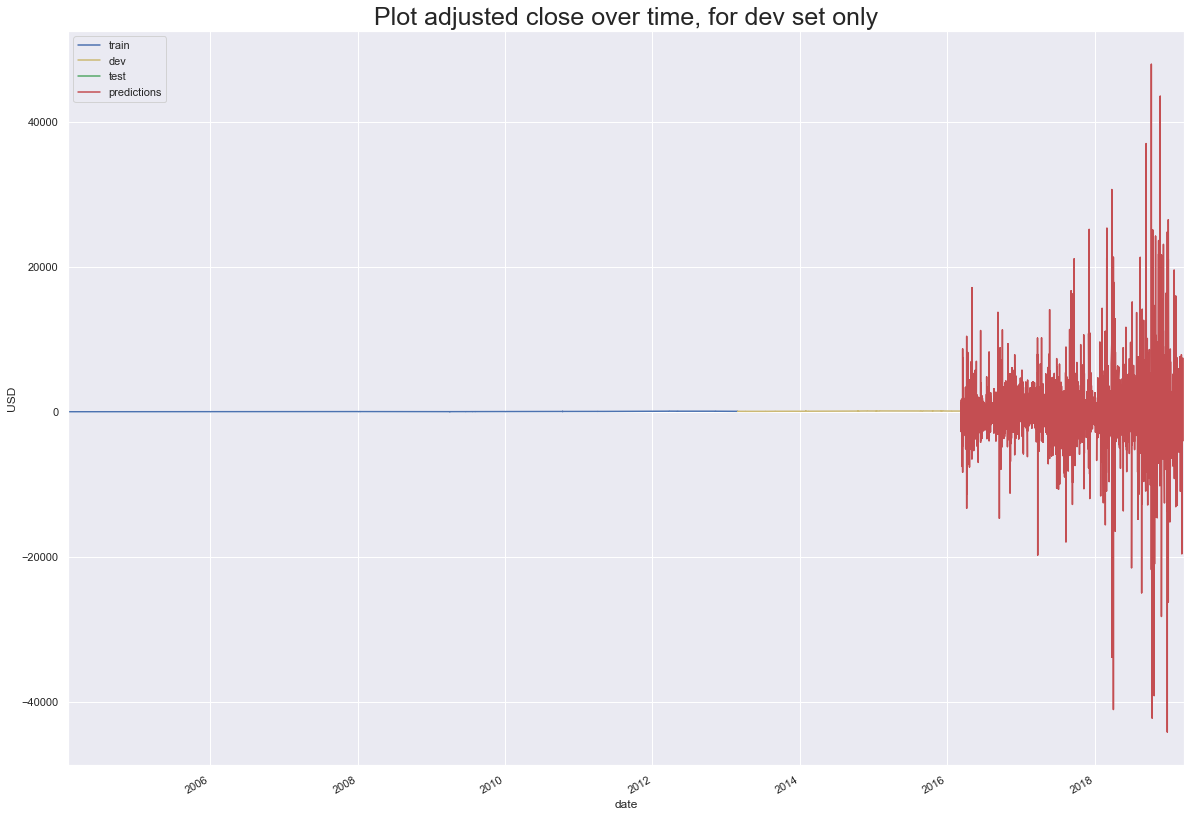

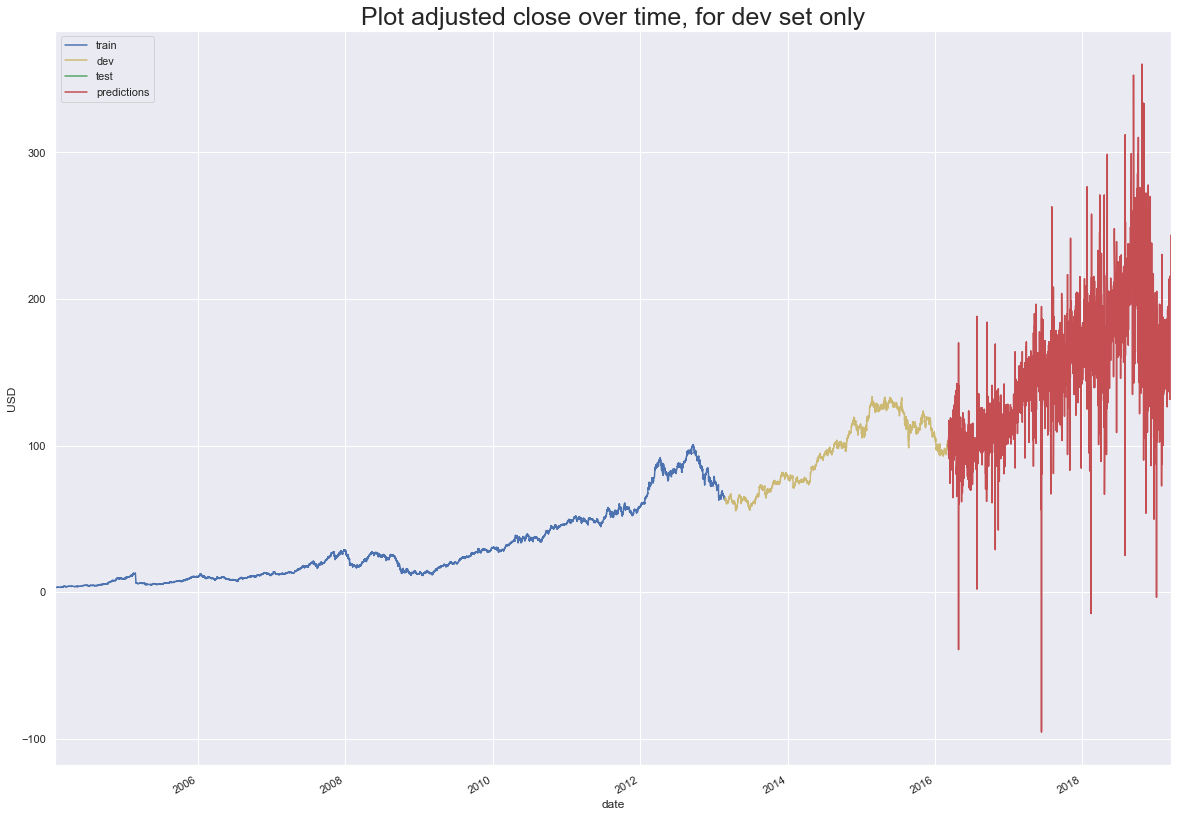

In [37]:

from sklearn.metrics import r2_score

i = 1
results_test = []
rmse_test = []
mape_test = []
acc_test = []
r2_test = []
print(X_sample.shape)
while i <= 4:
    print(i)
    polynomial_features = PolynomialFeatures(degree=i,
                                                 include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
    model = pipeline.fit(X_train_scaled, y_train_scaled)
    est_scaled = model.predict(new_x)
    test['est_scaled'] = est_scaled
    test['est'] = test['est_scaled'] * test['WEIGHTED AV. PRICE_std'] + test['WEIGHTED AV. PRICE_mean']

    results_test.append(test['est'])
    a = math.sqrt(mean_squared_error(y_sample, test['est']))
    print(a)
    rmse_test.append(a)
    b = get_mape(y_sample, test['est'])
    print(b)
    mape_test.append(b)
    acc = model.score( X_sample, test['est'].values.reshape(-1,1))
    acc_test.append(acc)
    r2 = r2_score(y_sample, test['est'])
    r2_test.append(r2)
    rcParams['figure.figsize'] = 20, 15 # width 10, height 8

    est_df = pd.DataFrame({'est': test['est'], 
                       'DATE': test['DATE']})

    ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
    ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='y-', grid=True, ax=ax)
    ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
    ax = est_df.plot(x='DATE', y='est', style='r-', grid=True, ax=ax)
    ax.legend(['train', 'dev', 'test', 'predictions'])
    ax.set_title('Plot adjusted close over time, for dev set only', fontsize=25)
    ax.set_xlabel("date")
    ax.set_ylabel("USD")
    
    i = i+1

print(rmse)
print(mape)
plt.show()

[0.7754261380087561, 4.14387784628369, 3823.975828606146, 19.069569326578584]
[0.2827366355226306, 1.7626834526386743, 1250.279041632338, 7.041192134009602]
[-0.5565835894005777, -205675598.64925048, -515922264927008.56, -4.5544649165964455e+31]
[0.9995298645843678, 0.9865737111751661, -11432.320367710818, 0.7156692269797085]


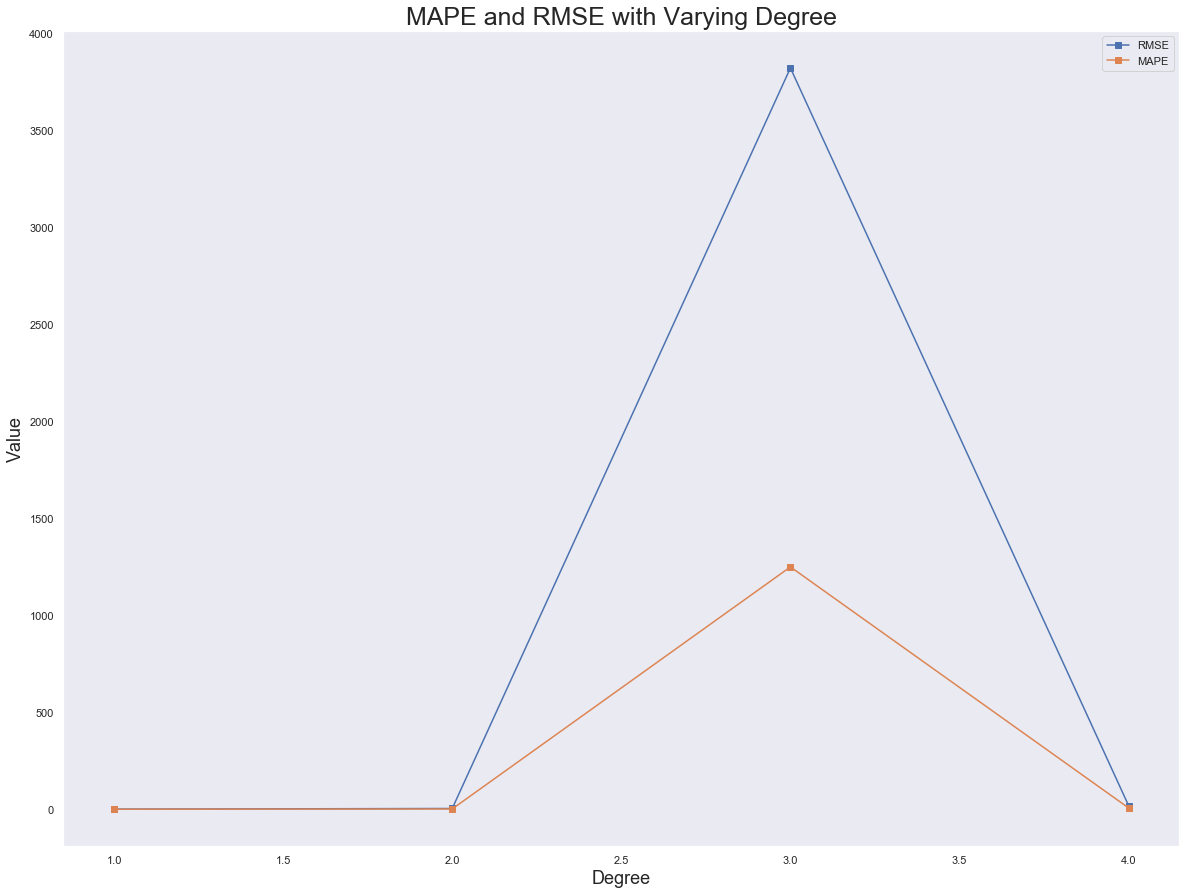

In [69]:
print(rmse_test)
print(mape_test)
print(acc_test)
print(r2_test)
x = [1,2,3,4]
y1 = rmse_test
y2 = mape_test
y3 = acc_test
y4 = r2_test

plt.plot(x, y1, label='RMSE', marker='s')
plt.plot(x, y2, label='MAPE', marker='s')
#plt.plot(x, y3, label='Accuracy', marker='s')
#plt.plot(x, y4, label='R^2', marker='s')
plt.title("MAPE and RMSE with Varying Degree", fontsize=25)
plt.xlabel('Degree', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.grid()
plt.legend()
plt.show()

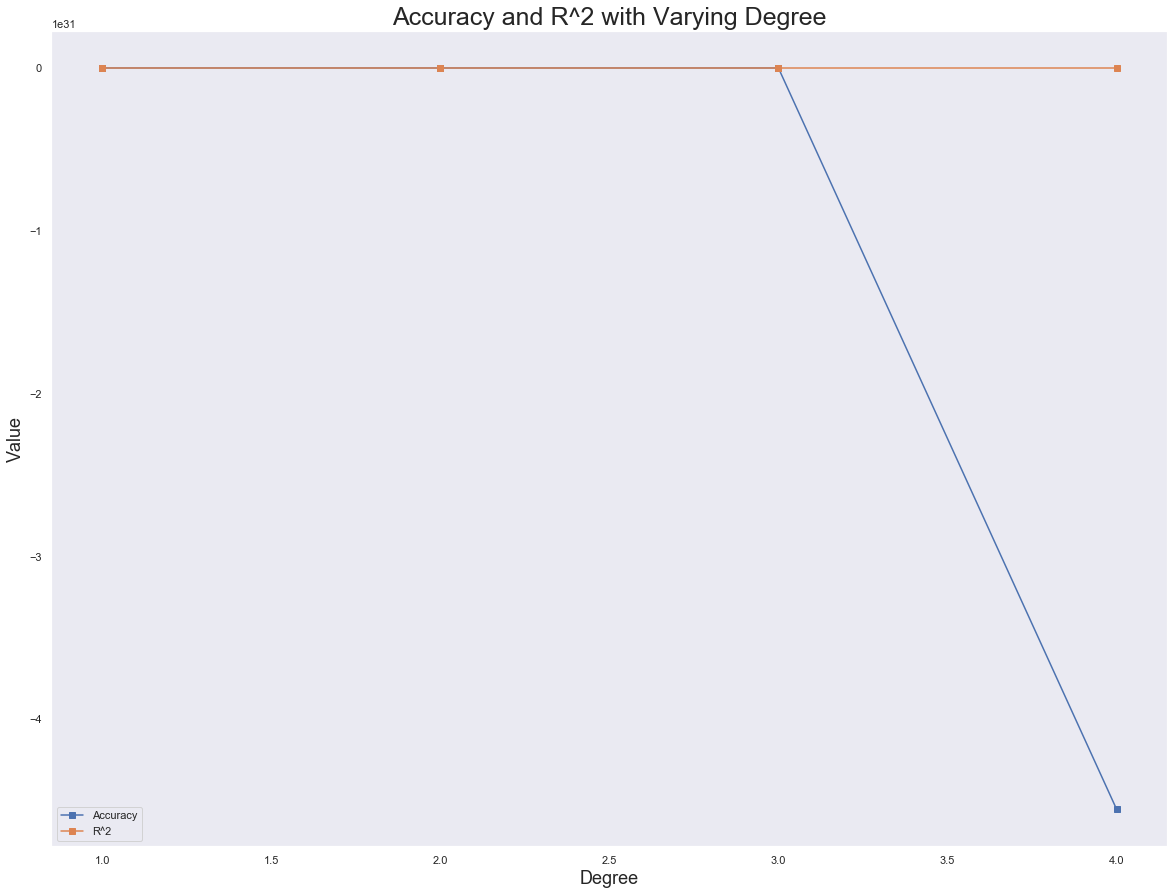

In [41]:
x = [1,2,3,4]
y1 = rmse_test
y2 = mape_test
y3 = acc_test
y4 = r2_test

#plt.plot(x, y1, label='RMSE', marker='s')
#plt.plot(x, y2, label='MAPE', marker='s')
plt.plot(x, y3, label='Accuracy', marker='s')
plt.plot(x, y4, label='R^2', marker='s')
plt.title("Accuracy and R^2 with Varying Degree", fontsize=25)
plt.xlabel('Degree', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.grid()
plt.legend()
plt.show()

The loss fucntions were minimized for degree 1, so we can assume that a polynomial model is not the best fit here.

2. We are going to train and validate several different sklearn regression models to see how each performs in comparison to the others straight out fo the box, not changing any parameters. 

SGD


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


SGD W/ Elasticnet


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Baysian Ridge


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 Lasso Lars


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Passive Agressive


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Theil-Sen Estimator


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Linear


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Decisition Tree


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


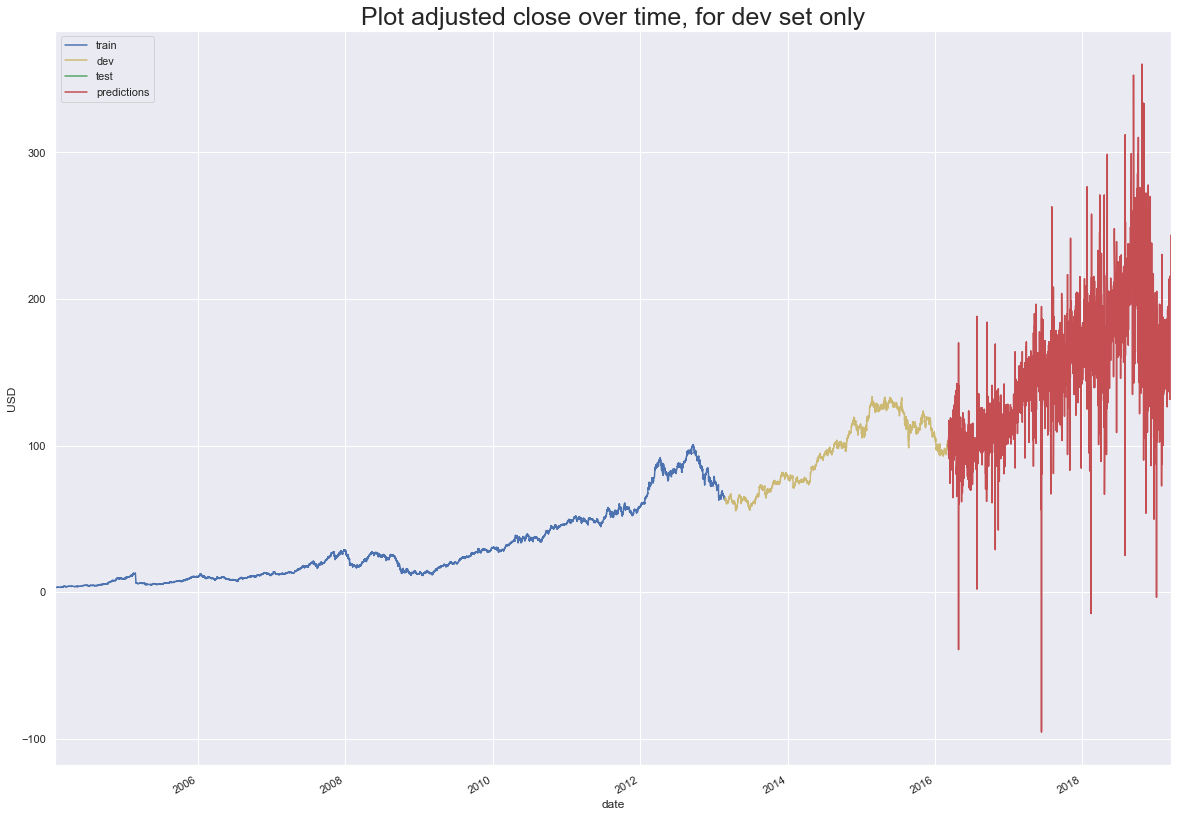

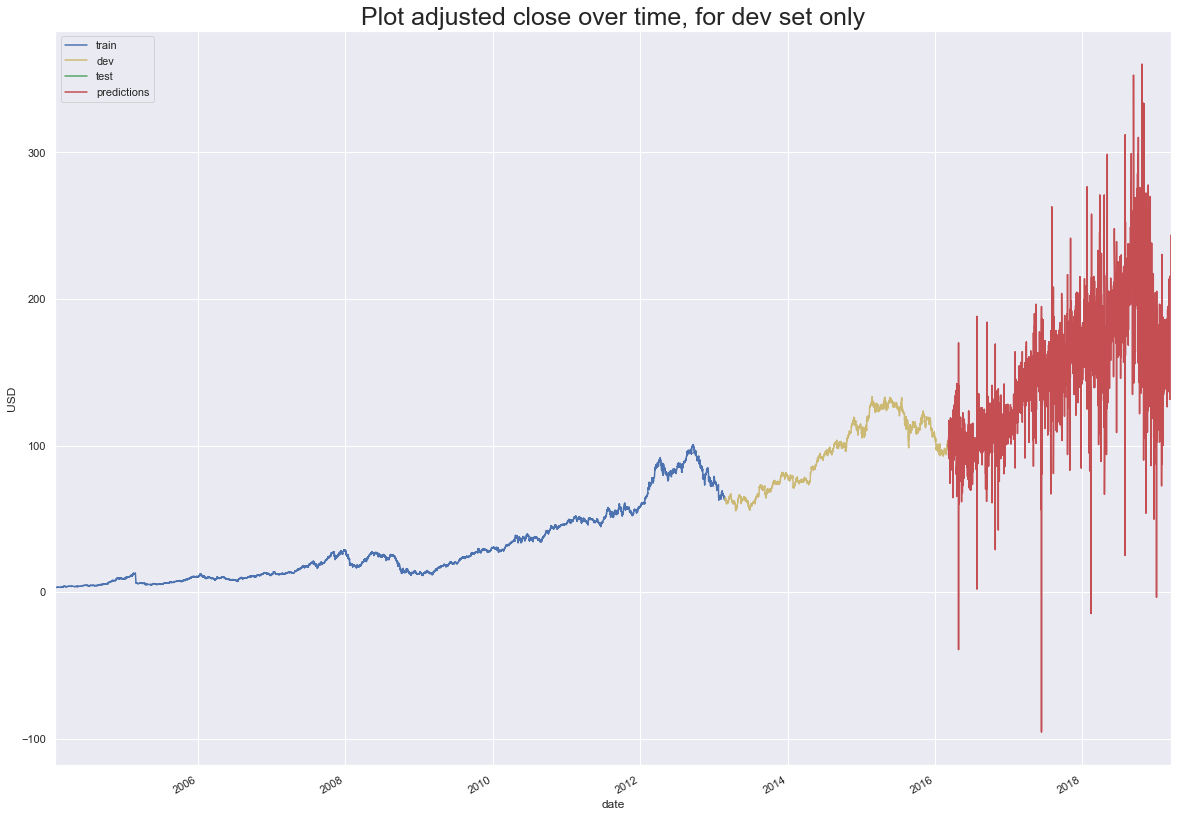

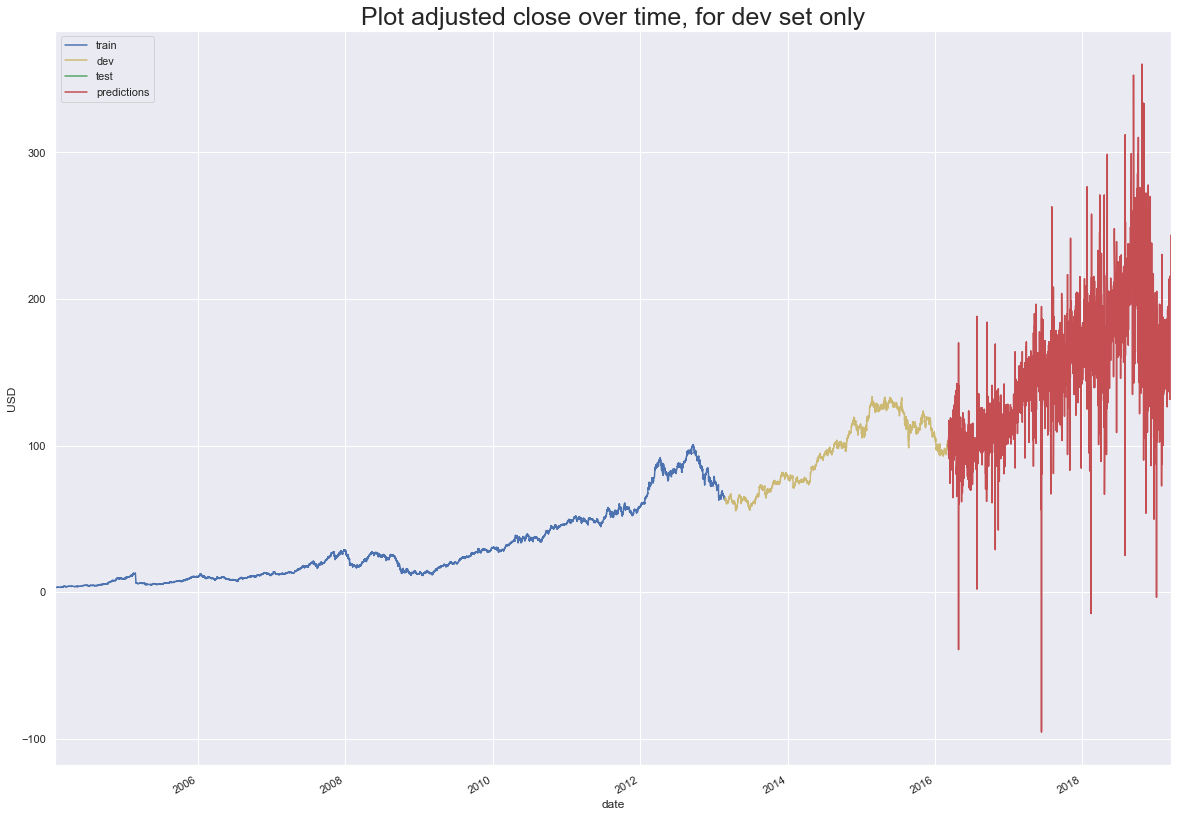

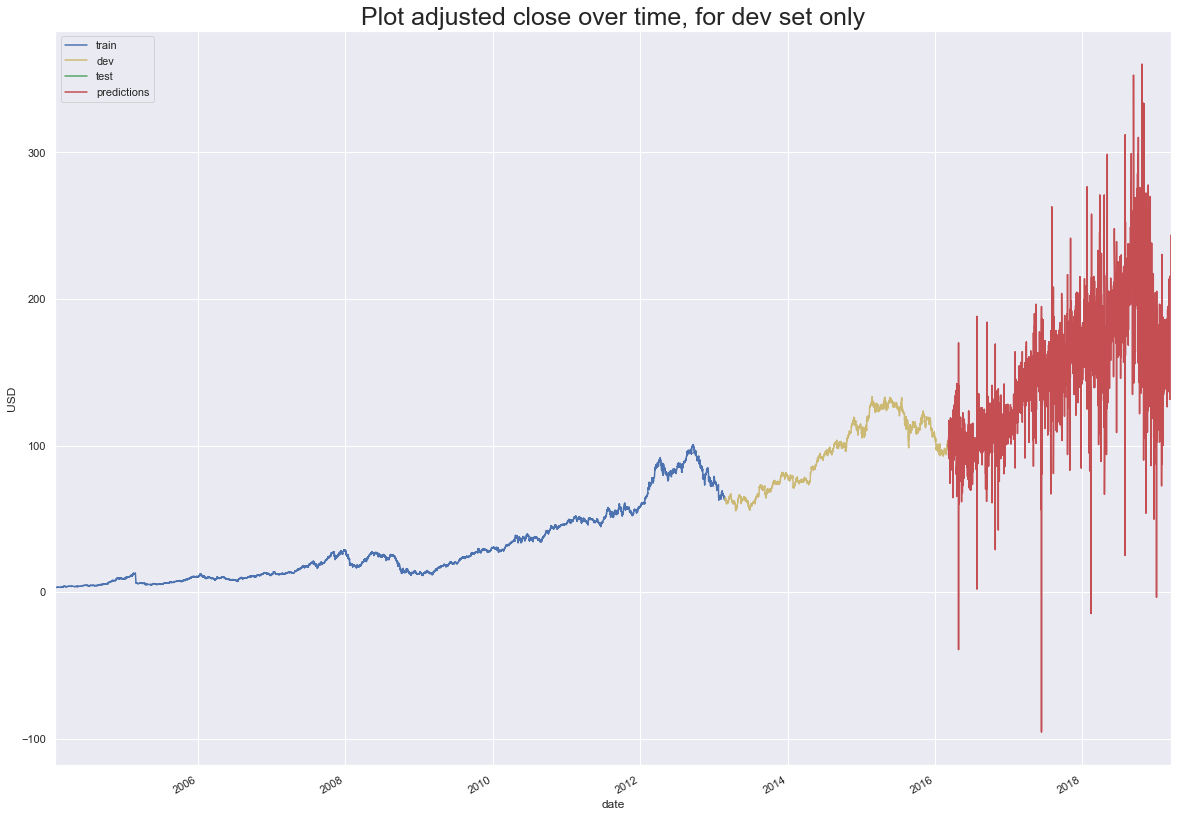

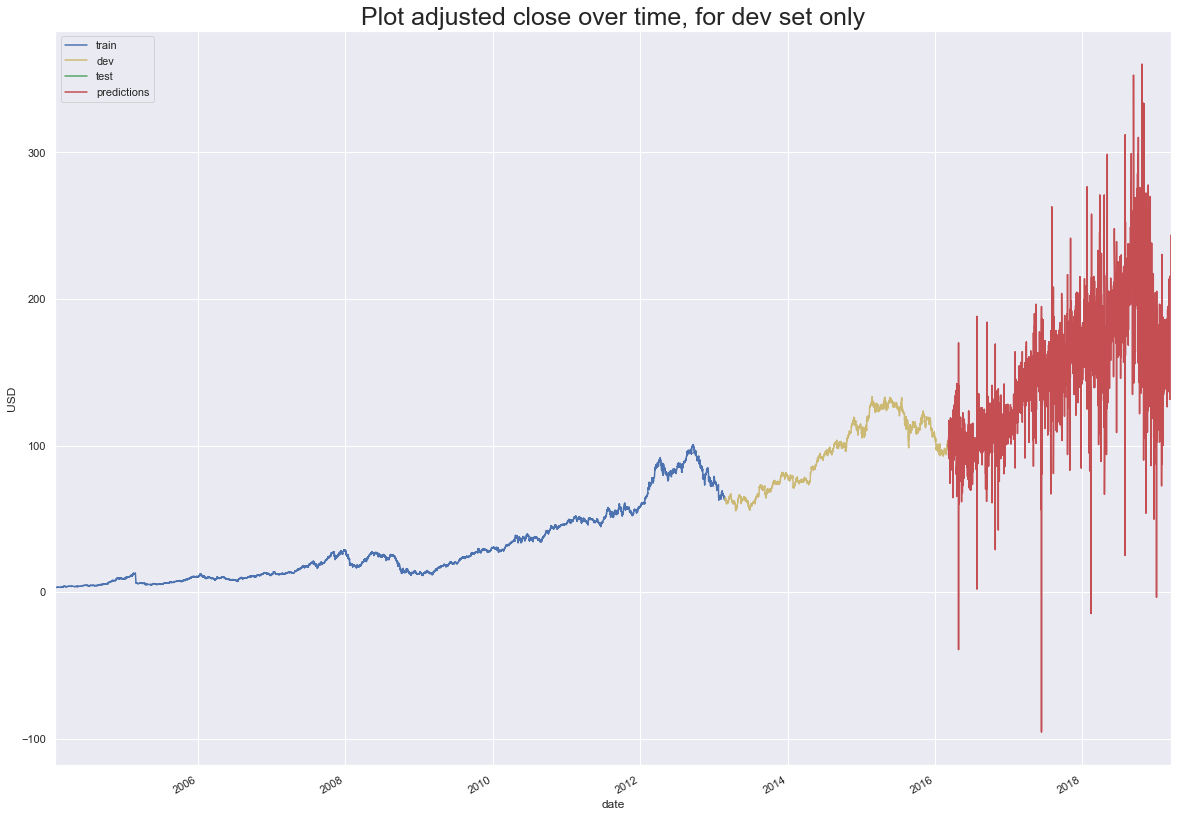

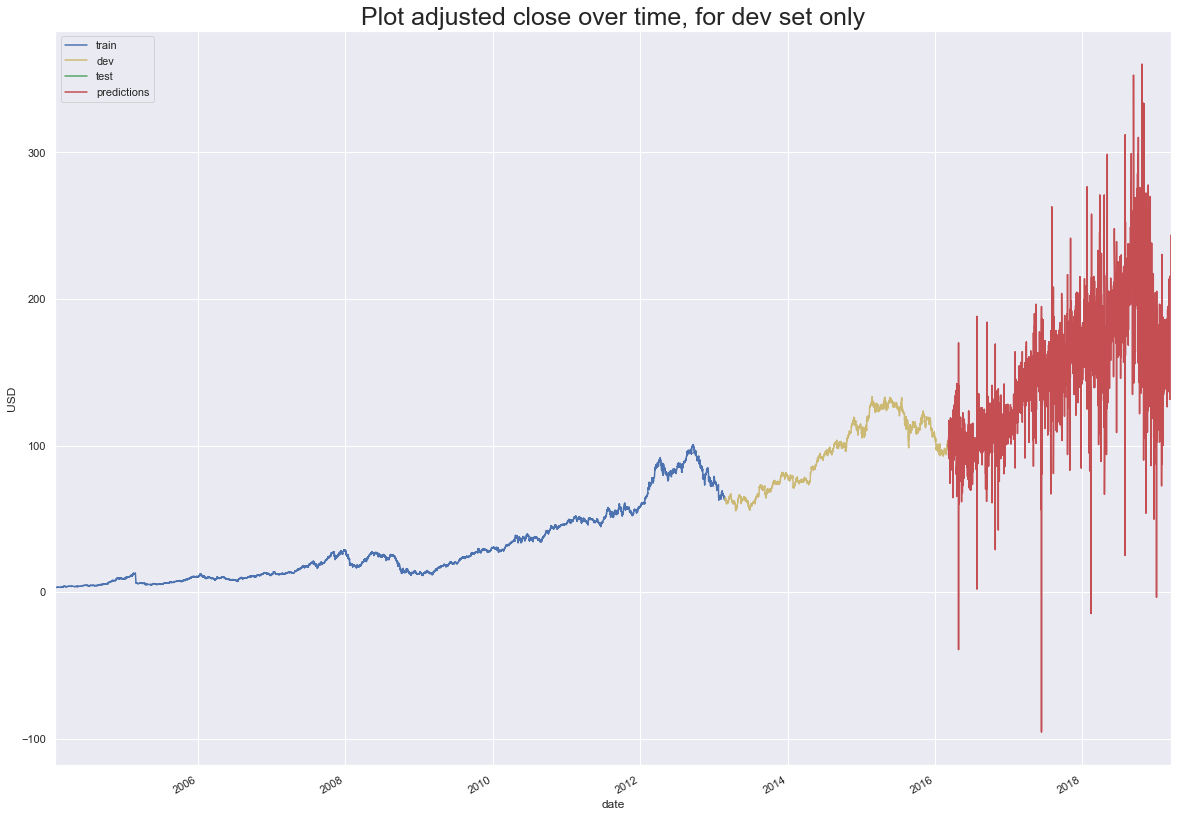

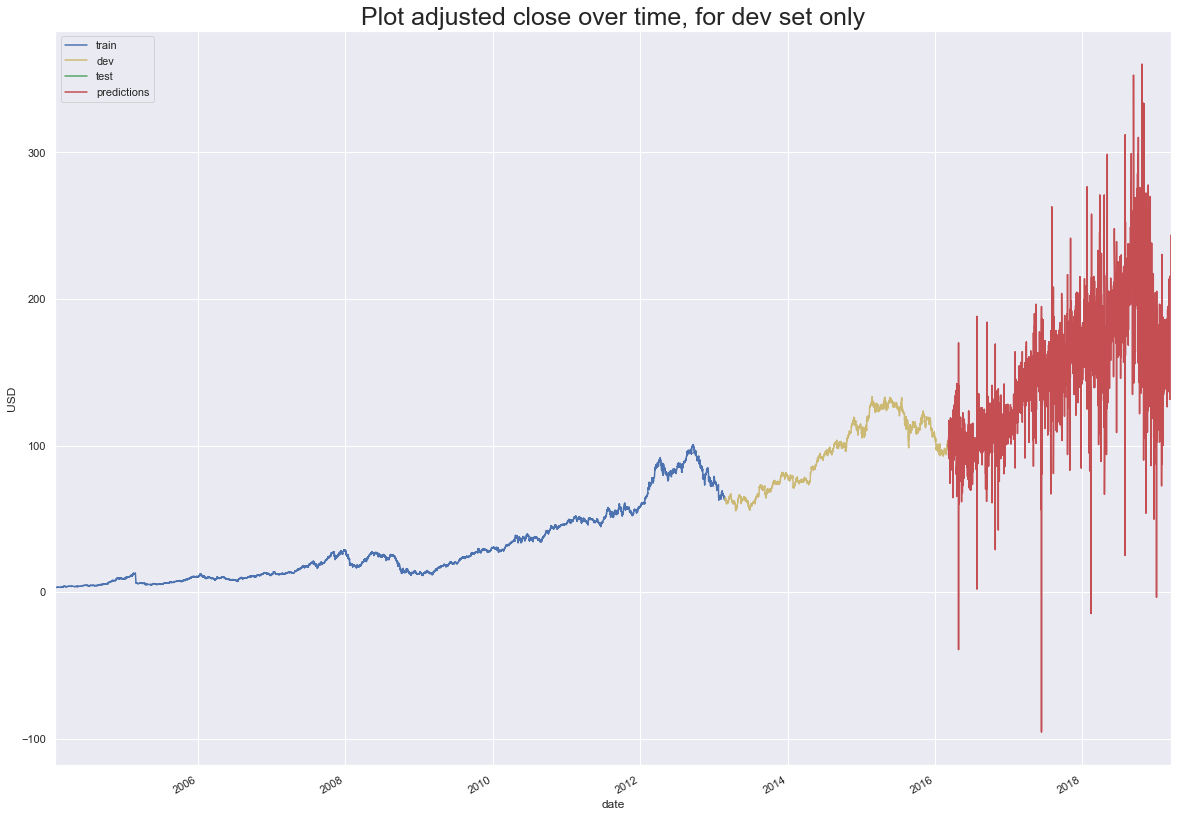

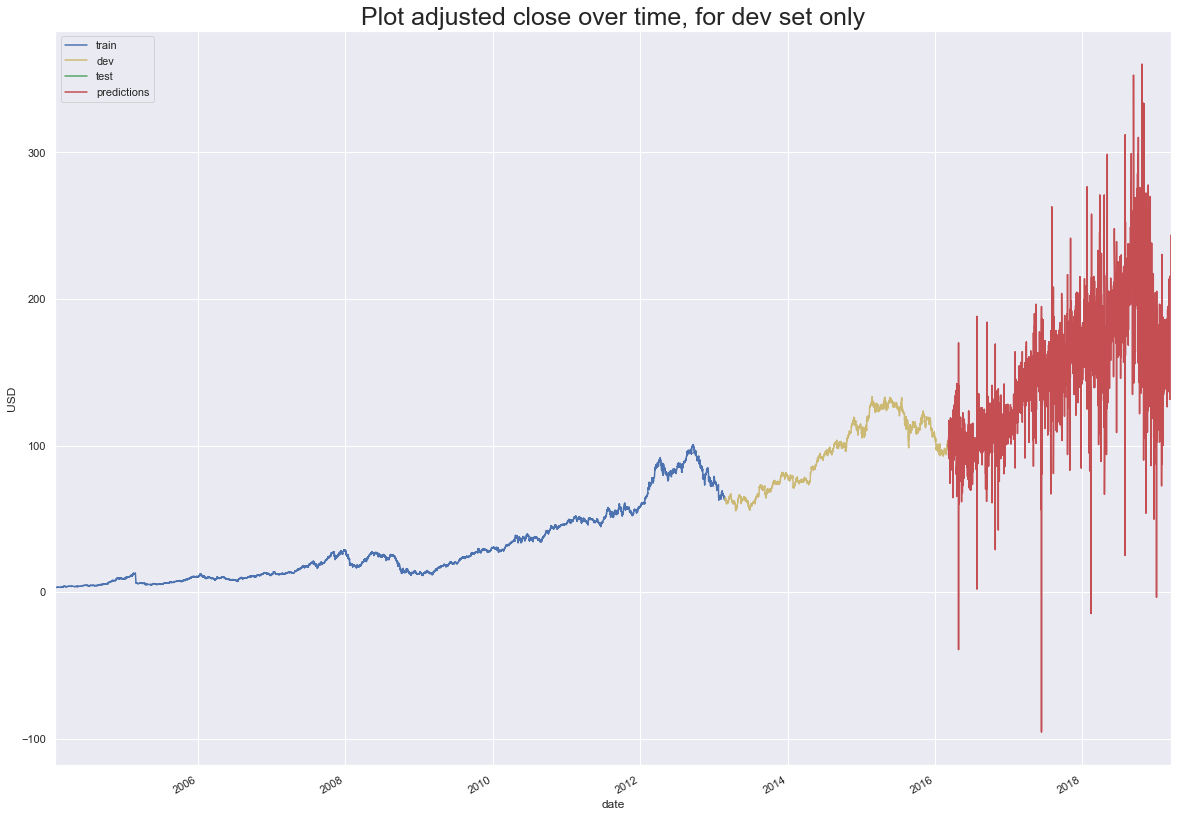

In [47]:
import numpy as np
from sklearn import linear_model
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
rmse_cl = []
mape_cl = []
acc_cl = []
r2_cl = []
classifiers = [
    linear_model.SGDRegressor(),
    linear_model.SGDRegressor(penalty='elasticnet', learning_rate='adaptive', ),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression(), 
    DecisionTreeRegressor(max_depth=2)]

classifiers2 = ['SGD', 'SGD W/ Elasticnet', 'Baysian Ridge',
                ' Lasso Lars', 'Passive Agressive',
               'Theil-Sen Estimator', 'Linear', 'Decisition Tree']
results_class = []
for item,name in zip(classifiers, classifiers2):
    print(name)
    clf = item
    clf.fit(X_train_scaled, y_train_scaled)
    est_scaled = model.predict(X_sample_scaled)
    test['est_scaled'] = est_scaled
    test['est'] = test['est_scaled'] * test['WEIGHTED AV. PRICE_std'] + test['WEIGHTED AV. PRICE_mean']
    results_class.append(test['est'])
    a = math.sqrt(mean_squared_error(y_sample, test['est']))
    rmse_cl.append(a)
    b = get_mape(y_sample, test['est'])
    mape_cl.append(b)
    acc = model.score( X_sample, test['est'].values.reshape(-1,1))
    acc_cl.append(acc)
    r2 = r2_score(y_sample, test['est'])
    r2_cl.append(r2)
    rcParams['figure.figsize'] = 20, 15 # width 10, height 8

    est_df = pd.DataFrame({'est': test['est'], 
                       'DATE': test['DATE']})

    ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
    ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='y-', grid=True, ax=ax)
    ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
    ax = est_df.plot(x='DATE', y='est', style='r-', grid=True, ax=ax)
    ax.legend(['train', 'dev', 'test', 'predictions'])
    ax.set_title('Plot adjusted close over time, for dev set only', fontsize=25)
    ax.set_xlabel("date")
    ax.set_ylabel("USD")

[19.069569326578584, 19.069569326578584, 19.069569326578584, 19.069569326578584, 19.069569326578584, 19.069569326578584, 19.069569326578584, 19.069569326578584]
[7.041192134009602, 7.041192134009602, 7.041192134009602, 7.041192134009602, 7.041192134009602, 7.041192134009602, 7.041192134009602, 7.041192134009602]
[-4.5544649165964455e+31, -4.5544649165964455e+31, -4.5544649165964455e+31, -4.5544649165964455e+31, -4.5544649165964455e+31, -4.5544649165964455e+31, -4.5544649165964455e+31, -4.5544649165964455e+31]
[0.7156692269797085, 0.7156692269797085, 0.7156692269797085, 0.7156692269797085, 0.7156692269797085, 0.7156692269797085, 0.7156692269797085, 0.7156692269797085]


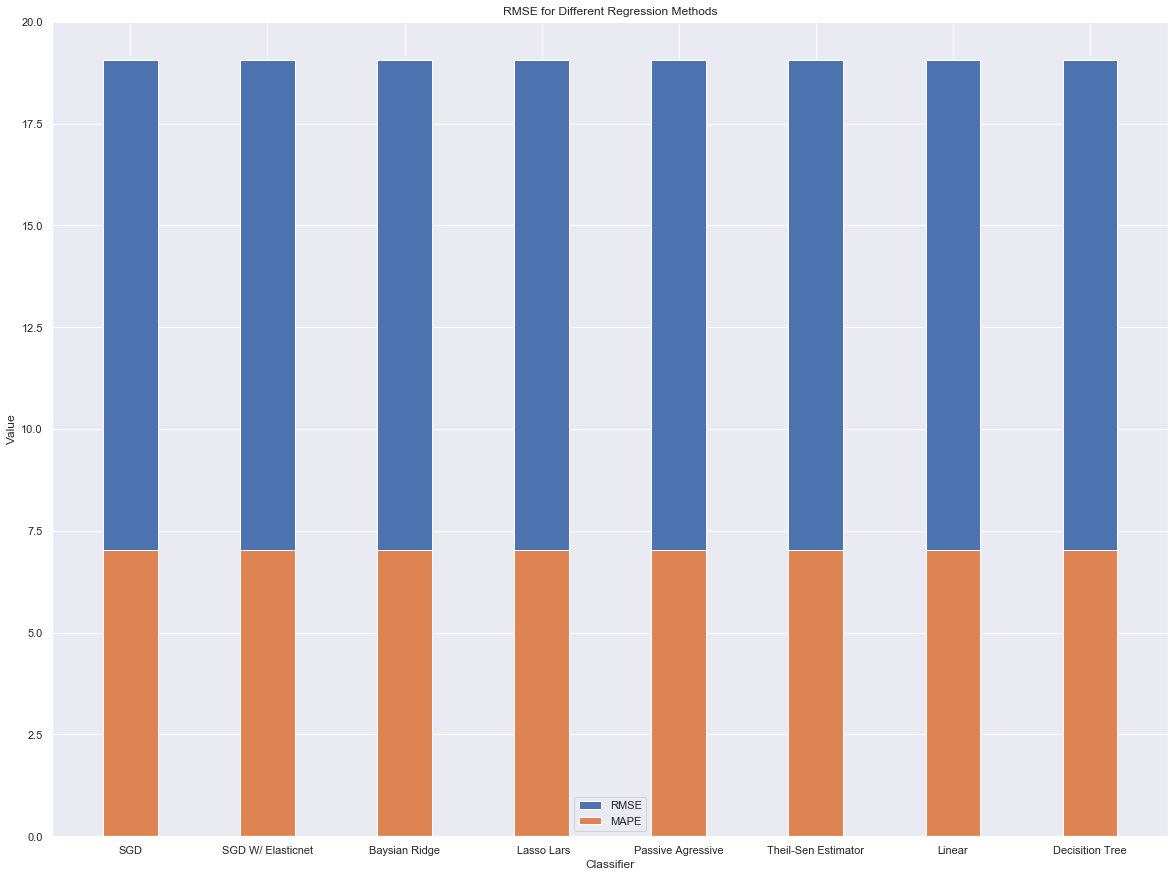

In [68]:

x = classifiers2
print(rmse_cl)
print(mape_cl)
print(acc_cl)
print(r2_cl)
y1 = rmse_cl
y2 = mape_cl
width = 0.4
fig, ax = plt.subplots()
rects1 = ax.bar(x, y1, width, label='RMSE')
rects2 = ax.bar(x, y2, width, label='MAPE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classifier')
ax.set_ylabel('Value')
ax.set_title('RMSE for Different Regression Methods')
ax.set_xticks(classifiers2)
ax.set_xticklabels(classifiers2)
ax.legend()

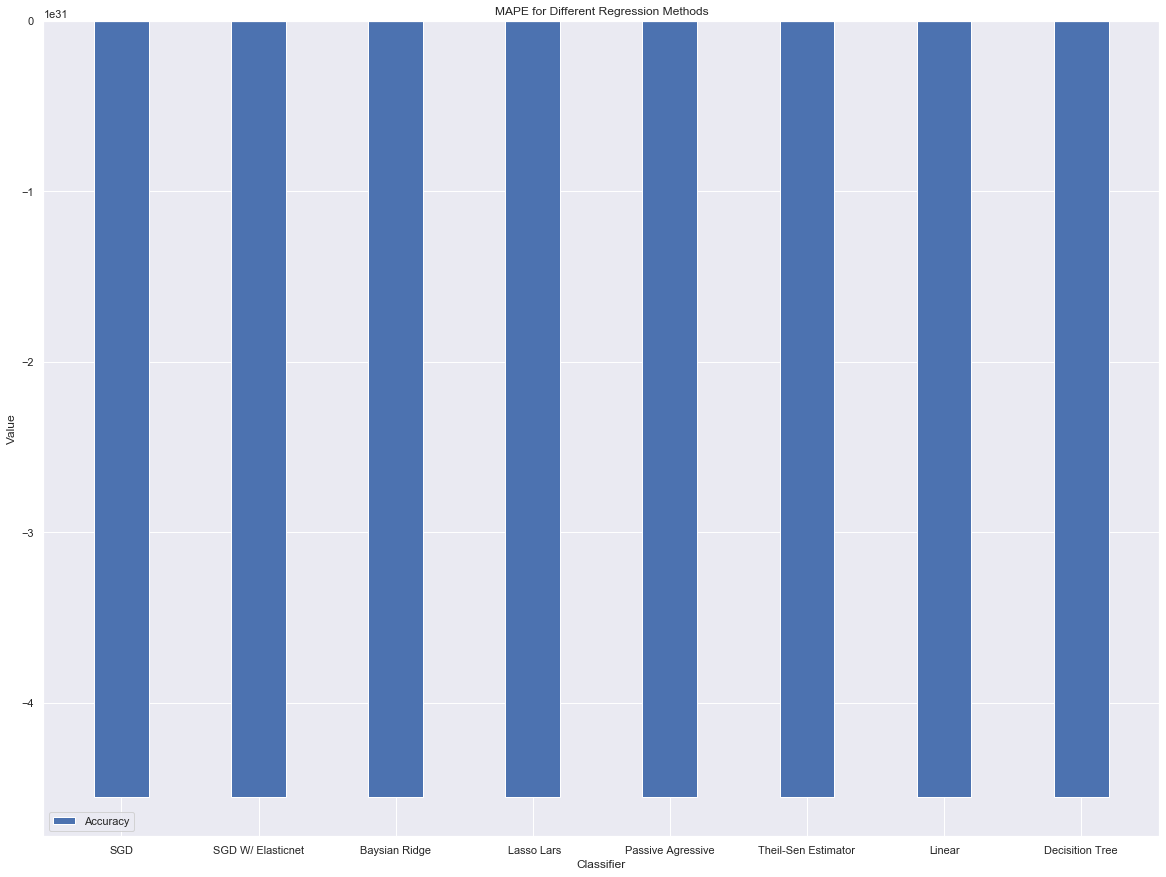

In [52]:
x = classifiers2
y1 = r2_cl
y2 = acc_cl
width = 0.4
fig, ax = plt.subplots()
#rects1 = ax.bar(x, y1, width, label='R^2')
rects2 = ax.bar(x, y2, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classifier')
ax.set_ylabel('Value')

ax.set_title('MAPE for Different Regression Methods')
ax.set_xticks(classifiers2)
ax.set_xticklabels(classifiers2)
ax.legend()

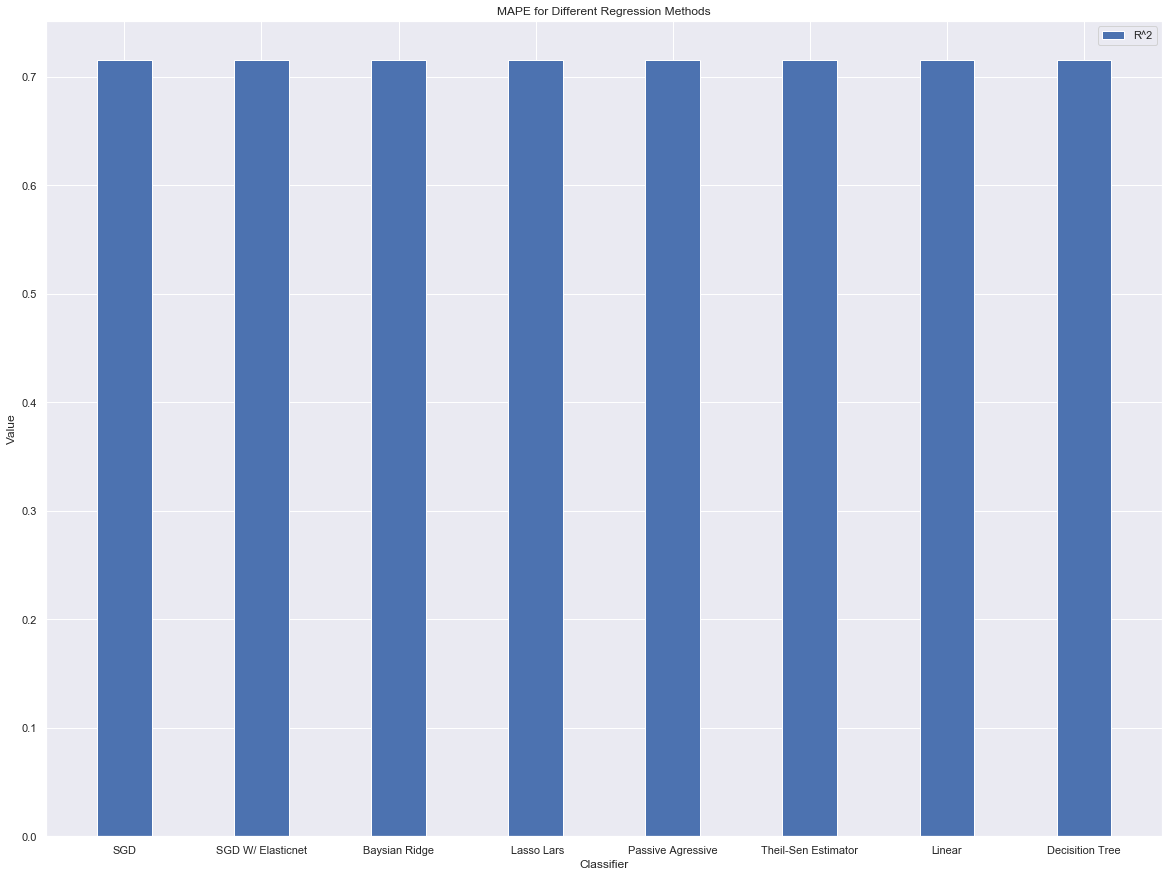

In [54]:
x = classifiers2
y1 = r2_cl
y2 = acc_cl
width = 0.4
fig, ax = plt.subplots()
rects1 = ax.bar(x, y1, width, label='R^2')
#rects2 = ax.bar(x, y2, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classifier')
ax.set_ylabel('Value')

ax.set_title('MAPE for Different Regression Methods')
ax.set_xticks(classifiers2)
ax.set_xticklabels(classifiers2)
ax.legend()

It appeqrs that each of the models performs nearly the same. No model does well straigh out of the box, so we are going to have to tune our paramters in oder to 

***SVR***

<br>
We are going to train and test (on the validation set) in order to identify which C and gamma parameters result in the best model. We will then run that model on our test data to find the loss functions and R^2 value

In [152]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sys
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
results_cv = []
val_cv = []

best = (None, None, 9999999)
for c1 in range(-3,8+1):
    for g1 in range(-3, 8+1):
        print("C:", c1)
        print("gamma:", g1)
        svr = SVR(kernel= 'rbf', C=2**c1, gamma=2**g1)
        model = svr.fit(X_train_scaled, y_train_scaled)
        est_scaled = model.predict(new_x)
        cv['est_scaled'] = est_scaled
        cv['est'] = cv['est_scaled'] * cv['WEIGHTED AV. PRICE_std'] + cv['WEIGHTED AV. PRICE_mean']
        mse = mean_squared_error(new_y, cv['est'])
        mae = mean_absolute_error(new_y, cv['est'])
        rmse = math.sqrt(mean_squared_error(new_y, cv['est']))
        mape = get_mape(new_y, cv['est'])
        acc = model.score(new_x, cv['est'].values.reshape(-1,1))
        r2 = r2_score(new_y, cv['est'])
        vals_cv = [rmse,mape,c1,g1,acc,r2, mse, mae]
        results_cv.append(vals_cv)
        print(r2)

C: -3
gamma: -3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9975352618164233
C: -3
gamma: -2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9981316394016341
C: -3
gamma: -1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9984380038758759
C: -3
gamma: 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9984215348436121
C: -3
gamma: 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983644580787543
C: -3
gamma: 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983245466984717
C: -3
gamma: 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983063042664782
C: -3
gamma: 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982926090223625
C: -3
gamma: 5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998287603512577
C: -3
gamma: 6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982876035132144
C: -3
gamma: 7


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982876035132144
C: -3
gamma: 8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982876035132144
C: -2
gamma: -3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9973904573233796
C: -2
gamma: -2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9979608531154303
C: -2
gamma: -1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998394636175055
C: -2
gamma: 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9984227955234601
C: -2
gamma: 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998385416440617
C: -2
gamma: 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983373515074221
C: -2
gamma: 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983092419785252
C: -2
gamma: 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982936353731566
C: -2
gamma: 5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982858610934632
C: -2
gamma: 6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982855724015903
C: -2
gamma: 7


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998285572401586
C: -2
gamma: 8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998285572401586
C: -1
gamma: -3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9972721520198832
C: -1
gamma: -2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9978086862432068
C: -1
gamma: -1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982945062588726
C: -1
gamma: 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9984071392066001
C: -1
gamma: 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983946454897069
C: -1
gamma: 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998365345849113
C: -1
gamma: 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998341006907652
C: -1
gamma: 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983261655170055
C: -1
gamma: 5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983164182229372
C: -1
gamma: 6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983147625596966
C: -1
gamma: 7


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983147588210474
C: -1
gamma: 8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983147585760218
C: 0
gamma: -3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9971945132418417
C: 0
gamma: -2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9976488356028722
C: 0
gamma: -1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9981306443633087
C: 0
gamma: 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983452146835372
C: 0
gamma: 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983777565957689
C: 0
gamma: 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983804114623491
C: 0
gamma: 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983772450026516
C: 0
gamma: 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983718464588021
C: 0
gamma: 5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983668506681778
C: 0
gamma: 6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983651316702084
C: 0
gamma: 7


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983650250265295
C: 0
gamma: 8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983650233011326
C: 1
gamma: -3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9971857955827632
C: 1
gamma: -2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.997590768648378
C: 1
gamma: -1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9979981206267542
C: 1
gamma: 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982302181823739
C: 1
gamma: 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983244859993841
C: 1
gamma: 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983624057375539
C: 1
gamma: 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998375411977569
C: 1
gamma: 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983789207400241
C: 1
gamma: 5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983797267387202
C: 1
gamma: 6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998379745985568
C: 1
gamma: 7


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983797438730543
C: 1
gamma: 8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983797438358669
C: 2
gamma: -3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9971859009499578
C: 2
gamma: -2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.997590768648378
C: 2
gamma: -1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9979980345529436
C: 2
gamma: 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982271827591316
C: 2
gamma: 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983201510127604
C: 2
gamma: 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983590763764639
C: 2
gamma: 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983732778053342
C: 2
gamma: 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983776951649522
C: 2
gamma: 5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998379229351116
C: 2
gamma: 6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983794915388027
C: 2
gamma: 7


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983795044038917
C: 2
gamma: 8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983795046091413
C: 3
gamma: -3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9971859009499578
C: 3
gamma: -2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.997590768648378
C: 3
gamma: -1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9979980345529436
C: 3
gamma: 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982271827591316
C: 3
gamma: 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983201510127604
C: 3
gamma: 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983590763764639
C: 3
gamma: 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983732778053342
C: 3
gamma: 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983776951649522
C: 3
gamma: 5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998379229351116
C: 3
gamma: 6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983794915388027
C: 3
gamma: 7


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983795044038917
C: 3
gamma: 8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983795046091413
C: 4
gamma: -3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9971859009499578
C: 4
gamma: -2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.997590768648378
C: 4
gamma: -1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9979980345529436
C: 4
gamma: 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982271827591316
C: 4
gamma: 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983201510127604
C: 4
gamma: 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983590763764639
C: 4
gamma: 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983732778053342
C: 4
gamma: 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983776951649522
C: 4
gamma: 5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998379229351116
C: 4
gamma: 6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983794915388027
C: 4
gamma: 7


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983795044038917
C: 4
gamma: 8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983795046091413
C: 5
gamma: -3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9971859009499578
C: 5
gamma: -2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.997590768648378
C: 5
gamma: -1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9979980345529436
C: 5
gamma: 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982271827591316
C: 5
gamma: 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983201510127604
C: 5
gamma: 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983590763764639
C: 5
gamma: 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983732778053342
C: 5
gamma: 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983776951649522
C: 5
gamma: 5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998379229351116
C: 5
gamma: 6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983794915388027
C: 5
gamma: 7


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983795044038917
C: 5
gamma: 8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983795046091413
C: 6
gamma: -3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9971859009499578
C: 6
gamma: -2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.997590768648378
C: 6
gamma: -1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9979980345529436
C: 6
gamma: 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982271827591316
C: 6
gamma: 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983201510127604
C: 6
gamma: 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983590763764639
C: 6
gamma: 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983732778053342
C: 6
gamma: 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983776951649522
C: 6
gamma: 5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998379229351116
C: 6
gamma: 6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983794915388027
C: 6
gamma: 7


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983795044038917
C: 6
gamma: 8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983795046091413
C: 7
gamma: -3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9971859009499578
C: 7
gamma: -2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.997590768648378
C: 7
gamma: -1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9979980345529436
C: 7
gamma: 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982271827591316
C: 7
gamma: 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983201510127604
C: 7
gamma: 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983590763764639
C: 7
gamma: 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983732778053342
C: 7
gamma: 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983776951649522
C: 7
gamma: 5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998379229351116
C: 7
gamma: 6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983794915388027
C: 7
gamma: 7


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983795044038917
C: 7
gamma: 8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983795046091413
C: 8
gamma: -3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9971859009499578
C: 8
gamma: -2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.997590768648378
C: 8
gamma: -1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9979980345529436
C: 8
gamma: 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9982271827591316
C: 8
gamma: 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983201510127604
C: 8
gamma: 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983590763764639
C: 8
gamma: 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983732778053342
C: 8
gamma: 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983776951649522
C: 8
gamma: 5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.998379229351116
C: 8
gamma: 6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983794915388027
C: 8
gamma: 7


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983795044038917
C: 8
gamma: 8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9983795046091413


In [155]:
minC = -4
minG = -4
mape = 10000
for val_cv in results:
    if val[1] < mape:
        mape = val_cv[1]
        minC = val_cv[2]
        minG = val_cv[3]
print('Minimizing MAPE')
print('Best C: ', minC)
print('Best Gamma: ', minG)
print("")
minC = -4
minG = -4
rmse = 10000
for val in results:
    if val[1] < rmse:
        rmse = val_cv[0]
        minC = val_cv[2]
        minG = val_cv[3]
print('Minimizing RMSE')
print('Best C: ', minC)
print('Best Gamma: ', minG)
print("")
minC = -4
minG = -4
mae = 10000
for val in results:
    if val[1] < mae:
        mae = val_cv[7]
        minC = val_cv[2]
        minG = val_cv[3]
print('Minimizing RMSE')
print('Best C: ', minC)
print('Best Gamma: ', minG)
print("")
minC = -4
minG = -4
mse = 10000
for val in results:
    if val[1] < mse:
        mse = val_cv[6]
        minC = val_cv[2]
        minG = val_cv[3]
print('Minimizing RMSE')
print('Best C: ', minC)
print('Best Gamma: ', minG)
print("")
minC = -4
minG = -4
r2 = -1000
for val in results:
    if val[3] > r2:
        r2 = val[5]
        minC = val[2]
        minG = val[3]
print('Maximizing R^2')
print('Best C: ', minC)
print('Best Gamma: ', minG)
print("") 

Minimizing MAPE
Best C:  -3
Best Gamma:  -3

Minimizing RMSE
Best C:  8
Best Gamma:  8

Minimizing RMSE
Best C:  8
Best Gamma:  8

Minimizing RMSE
Best C:  8
Best Gamma:  8

Maximizing R^2
Best C:  8
Best Gamma:  8



In [179]:
x = range(-3,8+1)
c1=[]
c2 =[]
c3 =[]
c4 =[]
c5 =[]
c6 =[]
c7 =[]
c8 =[]
c9 =[]
c10 = []
c11 =[]
c12 = []
d1 = []
d2 = []
d3 = []
d4 = []
d5 = []
d6 = []
d7 = []
d8 = []
d9 = []
d10 = []
d11 = []
d12 = []
mse1 = []
mse2 = []
mse3 = []
mse4 = []
mse5 = []
mse6 = []
mse7 = []
mse8 = []
mse9 = []
mse10 = []
mse11 = []
mse12 = []
r1 = []
r2 = []
r3 =[]
r4 =[]
r5 = []
r6 = []
r7 = []
r8 = []
r9 = []
r10 = []
r11 = []
r12 = []
mae1 = []
mae2 = []
mae3 =[]
mae4 =[]
mae5 = []
mae6 = []
mae7 = []
mae8 = []
mae9 = []
mae10 = []
mae11 = []
mae12 = []


for val in results_cv:
    if val[2] == -3:
        c1.append(val[0])
        d1.append(val[1])
        mse1.append(val[6])
        r1.append(val[5])
        mae1.append(val[7])
    if val[2] == -2:
        c2.append(val[0])
        d2.append(val[1])
        mse2.append(val[6])
        r2.append(val[5])
        mae2.append(val[7])
    if val[2] == -1:
        c3.append(val[0])
        d3.append(val[1])
        mse3.append(val[6])
        r3.append(val[5])
        mae3.append(val[7])
    if val[2] == 0:
        c4.append(val[0])
        d4.append(val[1])
        mse4.append(val[6])
        r4.append(val[5])
        mae4.append(val[7])
    if val[2] == 1:
        c5.append(val[0])
        d5.append(val[1])
        mse5.append(val[6])
        r5.append(val[5])
        mae5.append(val[7])
    if val[2] == 2:
        c6.append(val[0])
        d6.append(val[1])
        mse6.append(val[6])
        r6.append(val[5])
        mae6.append(val[7])
    if val[2] == 3:
        c7.append(val[0])
        d7.append(val[1])
        mse7.append(val[6])
        r7.append(val[5])
        mae7.append(val[7])
    if val[2] == 4:
        c8.append(val[0])
        d8.append(val[1])
        mse8.append(val[6])
        r8.append(val[5])
        mae8.append(val[7])
    if val[2] == 5:
        c9.append(val[0])
        d9.append(val[1])
        mse9.append(val[6])
        r9.append(val[5])
        mae9.append(val[7])
    if val[2] == 6:
        c10.append(val[0])
        d10.append(val[1])
        mse10.append(val[6])
        r10.append(val[5])
        mae10.append(val[7])
    if val[2] == 7:
        c11.append(val[0])
        d11.append(val[1])
        mse11.append(val[6])
        r11.append(val[5])
        mae11.append(val[7])
    if val[2] == 8:
        d12.append(val[1])
        c12.append(val[0])
        mse12.append(val[6])
        r12.append(val[5])
        mae12.append(val[7])
        

        


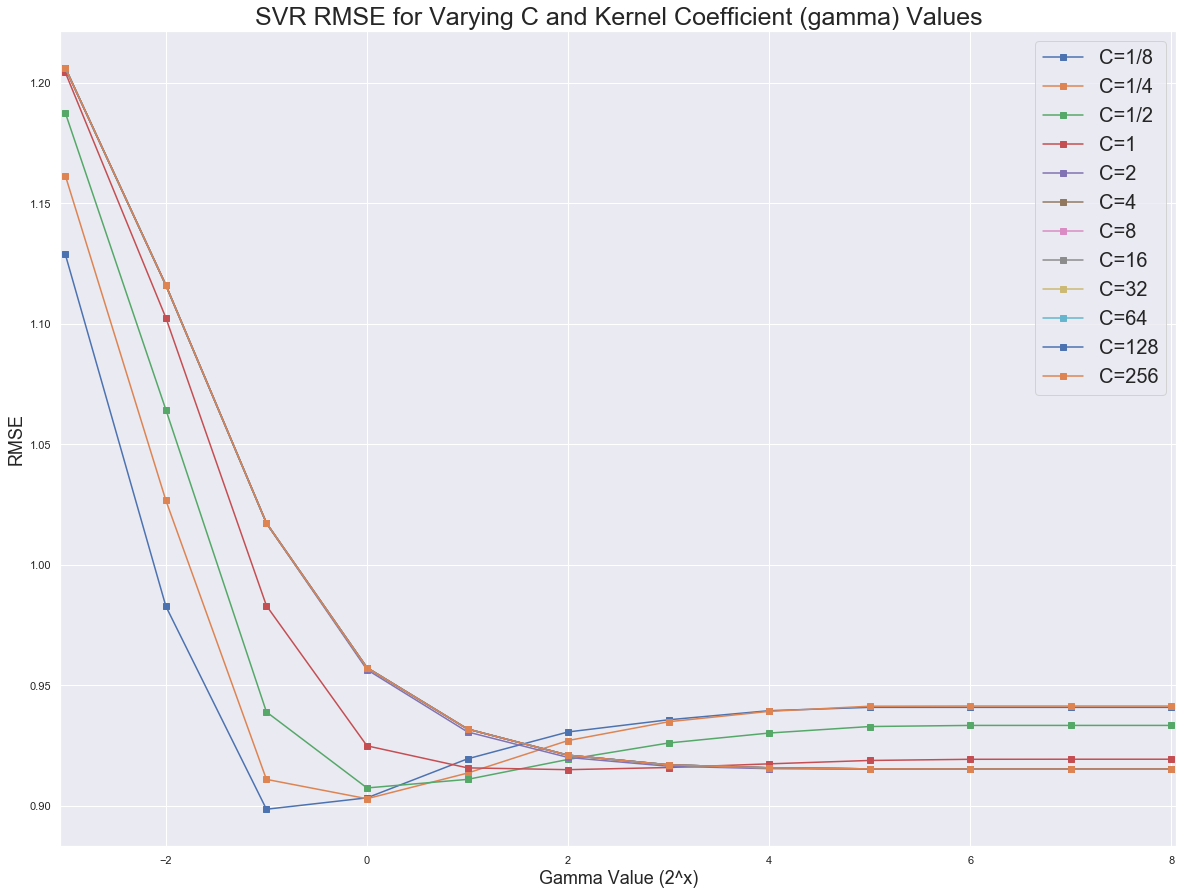

In [180]:
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)

plt.plot(x, c1, label='C=1/8', marker='s')
plt.plot(x, c2, label='C=1/4', marker='s')
plt.plot(x, c3, label='C=1/2', marker='s')
plt.plot(x, c4, label='C=1', marker='s')
plt.plot(x, c5, label='C=2', marker='s')
plt.plot(x, c6, label='C=4', marker='s')
plt.plot(x, c7, label='C=8', marker='s')
plt.plot(x, c8, label='C=16', marker='s')
plt.plot(x, c9, label='C=32', marker='s')
plt.plot(x, c10, label='C=64', marker='s')
plt.plot(x, c11, label='C=128', marker='s')
plt.plot(x, c12, label='C=256', marker='s')
plt.title("SVR RMSE for Varying C and Kernel Coefficient (gamma) Values", fontsize=25)
plt.xlabel('Gamma Value (2^x)', fontsize=18)
plt.ylabel('RMSE', fontsize=18)
plt.xlim(-3.05, 8.05)
plt.legend()
plt.show()

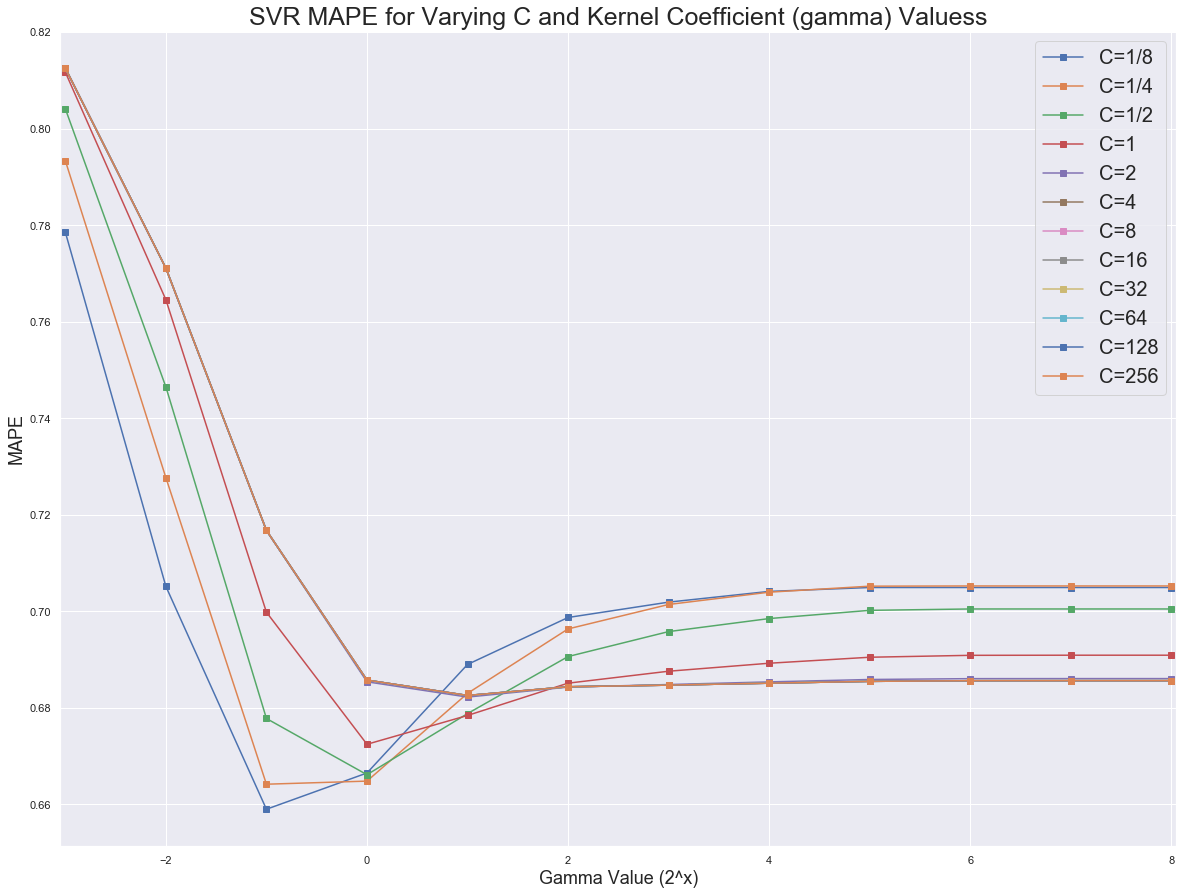

In [181]:
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)

plt.plot(x, d1, label='C=1/8', marker='s')
plt.plot(x, d2, label='C=1/4', marker='s')
plt.plot(x, d3, label='C=1/2', marker='s')
plt.plot(x, d4, label='C=1', marker='s')
plt.plot(x, d5, label='C=2', marker='s')
plt.plot(x, d6, label='C=4', marker='s')
plt.plot(x, d7, label='C=8', marker='s')
plt.plot(x, d8, label='C=16', marker='s')
plt.plot(x, d9, label='C=32', marker='s')
plt.plot(x, d10, label='C=64', marker='s')
plt.plot(x, d11, label='C=128', marker='s')
plt.plot(x, d12, label='C=256', marker='s')
plt.title("SVR MAPE for Varying C and Kernel Coefficient (gamma) Valuess", fontsize=25)
plt.xlabel('Gamma Value (2^x)', fontsize=18)
plt.ylabel('MAPE', fontsize=18)
plt.xlim(-3.05, 8.05)
plt.legend()
plt.show()

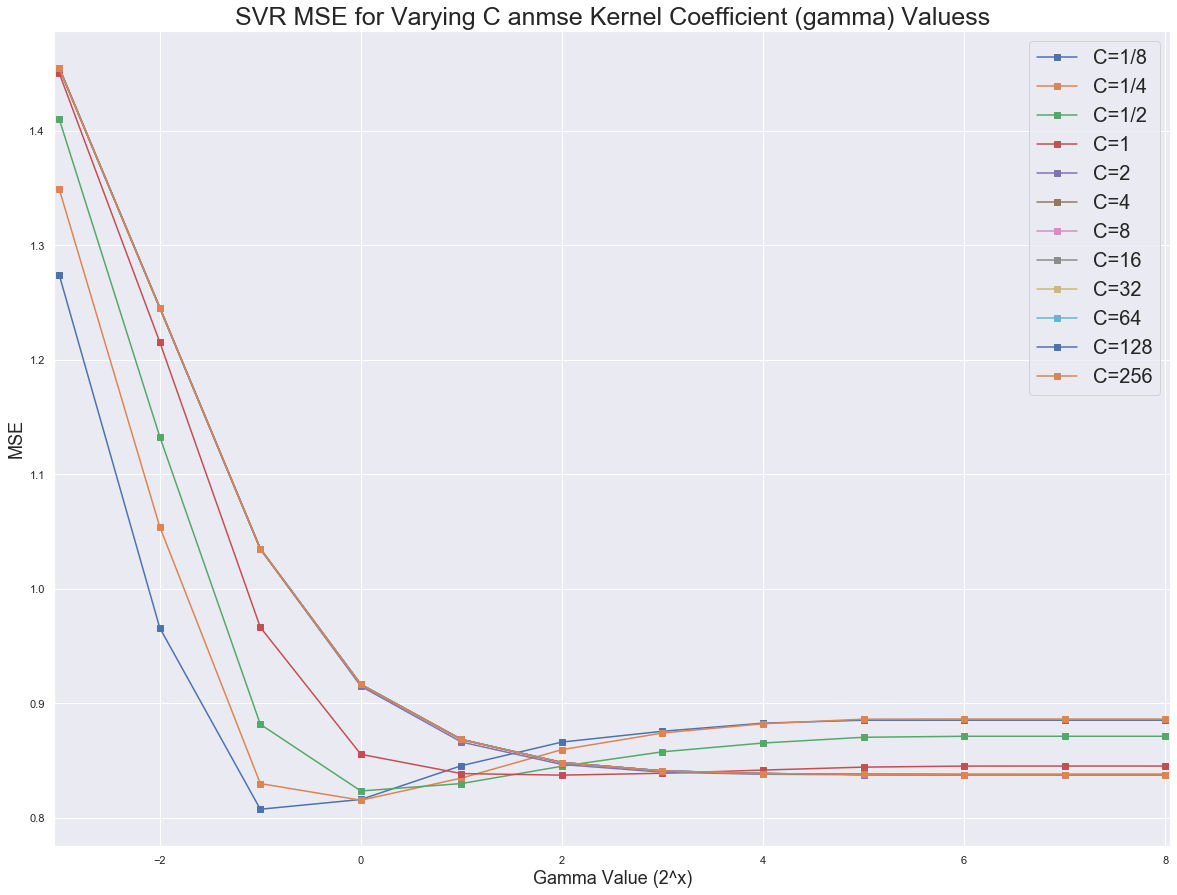

In [182]:
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.plot(x, mse1, label='C=1/8', marker='s')
plt.plot(x, mse2, label='C=1/4', marker='s')
plt.plot(x, mse3, label='C=1/2', marker='s')
plt.plot(x, mse4, label='C=1', marker='s')
plt.plot(x, mse5, label='C=2', marker='s')
plt.plot(x, mse6, label='C=4', marker='s')
plt.plot(x, mse7, label='C=8', marker='s')
plt.plot(x, mse8, label='C=16', marker='s')
plt.plot(x, mse9, label='C=32', marker='s')
plt.plot(x, mse10, label='C=64', marker='s')
plt.plot(x, mse11, label='C=128', marker='s')
plt.plot(x, mse12, label='C=256', marker='s')
plt.title("SVR MSE for Varying C anmse Kernel Coefficient (gamma) Valuess", fontsize=25)
plt.xlabel('Gamma Value (2^x)', fontsize=18)
plt.ylabel('MSE', fontsize=18)
plt.xlim(-3.05, 8.05)
plt.legend()
plt.show()

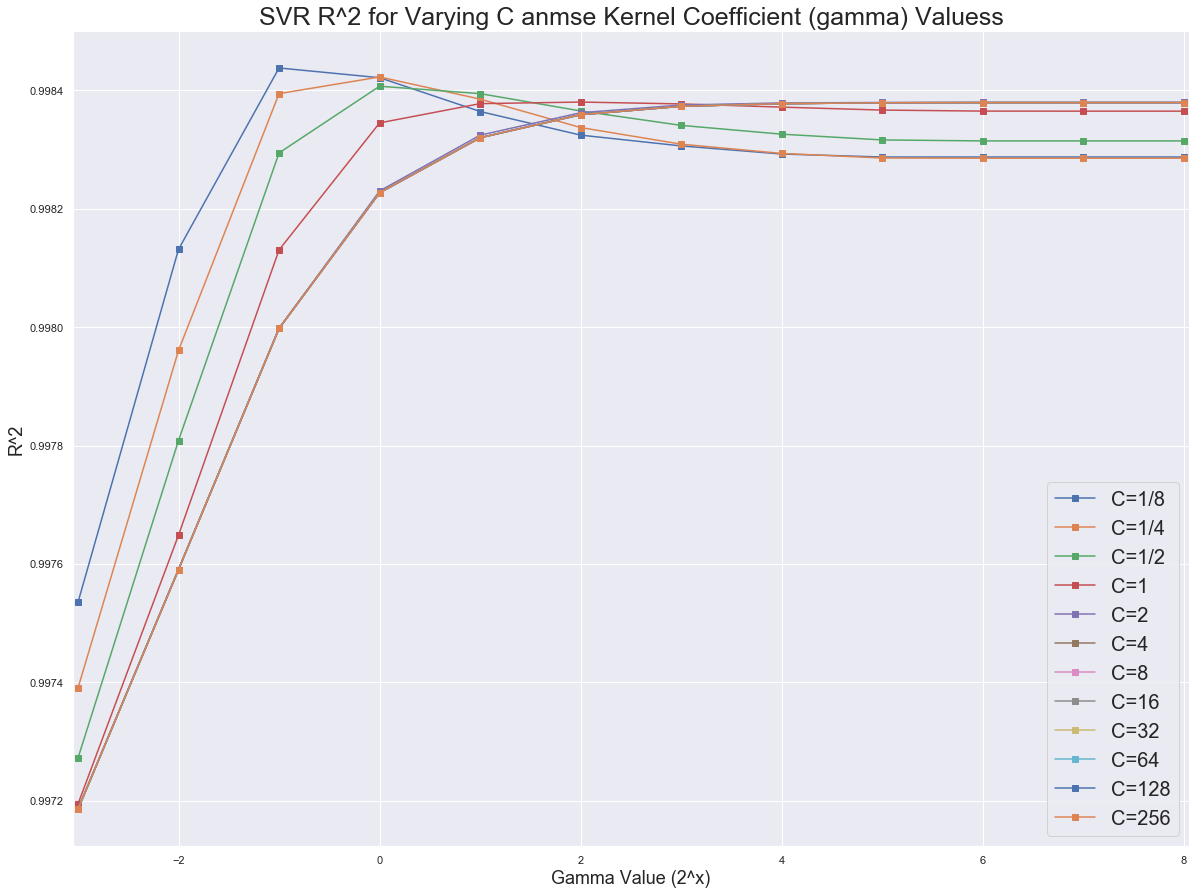

In [188]:
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)

plt.rcParams['legend.title_fontsize'] = 'xx-large'
plt.plot(x, r1, label='C=1/8', marker='s')
plt.plot(x, r2, label='C=1/4', marker='s')
plt.plot(x, r3, label='C=1/2', marker='s')
plt.plot(x, r4, label='C=1', marker='s')
plt.plot(x, r5, label='C=2', marker='s')
plt.plot(x, r6, label='C=4', marker='s')
plt.plot(x, r7, label='C=8', marker='s')
plt.plot(x, r8, label='C=16', marker='s')
plt.plot(x, r9, label='C=32', marker='s')
plt.plot(x, r10, label='C=64', marker='s')
plt.plot(x, r11, label='C=128', marker='s')
plt.plot(x, r12, label='C=256', marker='s')
plt.title("SVR R^2 for Varying C anmse Kernel Coefficient (gamma) Valuess", fontsize=25)
plt.xlabel('Gamma Value (2^x)', fontsize=18)
plt.ylabel('R^2', fontsize=18)
plt.xlim(-3.05, 8.05)
plt.legend()
plt.show()

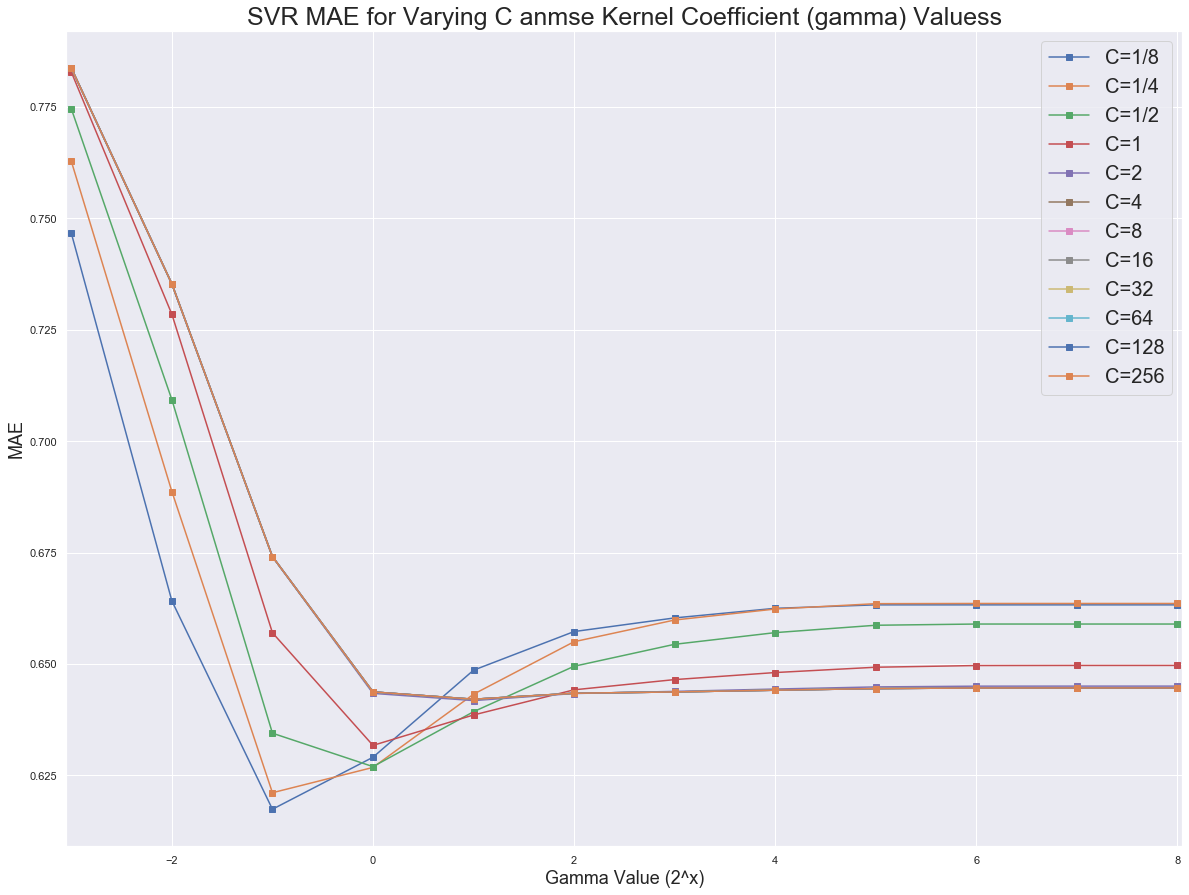

In [177]:
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)

plt.plot(x, mae1, label='C=1/8', marker='s')
plt.plot(x, mae2, label='C=1/4', marker='s')
plt.plot(x, mae3, label='C=1/2', marker='s')
plt.plot(x, mae4, label='C=1', marker='s')
plt.plot(x, mae5, label='C=2', marker='s')
plt.plot(x, mae6, label='C=4', marker='s')
plt.plot(x, mae7, label='C=8', marker='s')
plt.plot(x, mae8, label='C=16', marker='s')
plt.plot(x, mae9, label='C=32', marker='s')
plt.plot(x, mae10, label='C=64', marker='s')
plt.plot(x, mae11, label='C=128', marker='s')
plt.plot(x, mae12, label='C=256', marker='s')
plt.title("SVR MAE for Varying C anmse Kernel Coefficient (gamma) Valuess", fontsize=25)
plt.xlabel('Gamma Value (2^x)', fontsize=18)
plt.ylabel('MAE', fontsize=18)
plt.xlim(-3.05, 8.05)
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CPU times: user 8.71 s, sys: 62.7 ms, total: 8.78 s
Wall time: 8.84 s


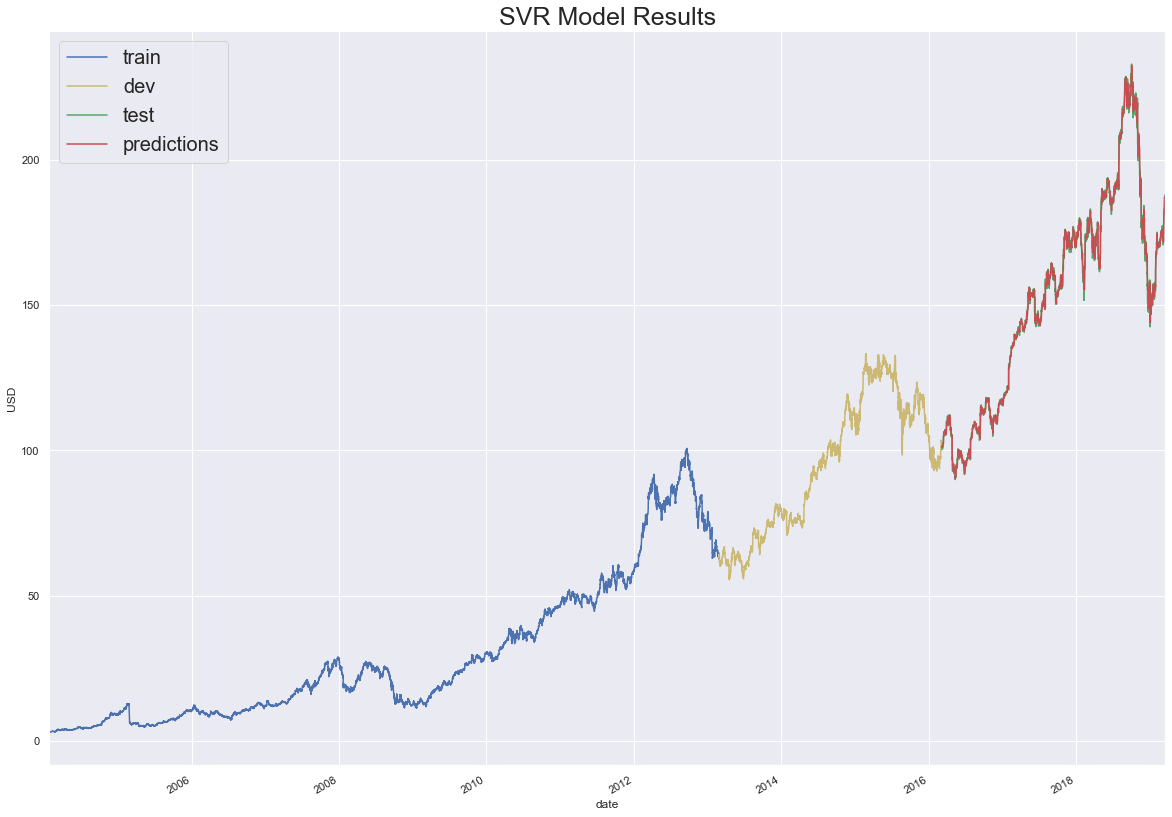

In [210]:
%%time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sys
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
results = []
val = []


svr = SVR(kernel= 'rbf', C=1/8, gamma=1/2)
model = svr.fit(X_train_scaled, y_train_scaled)
est_scaled = model.predict(X_sample_scaled)
test['est_scaled'] = est_scaled
test['est'] = test['est_scaled'] * test['WEIGHTED AV. PRICE_std'] + test['WEIGHTED AV. PRICE_mean']
mse = mean_squared_error(y_sample, test['est'])
mae = mean_absolute_error(y_sample, test['est'])
rmse = math.sqrt(mean_squared_error(y_sample, test['est']))
mape = get_mape(y_sample, test['est'])
acc = model.score( X_sample, test['est'].values.reshape(-1,1))
r2 = r2_score(y_sample, test['est'])
vals = [rmse,mape,c,g,acc,r2, mse, mae]
results.append(vals)

rcParams['figure.figsize'] = 20, 15 # width 10, height 8

est_df = pd.DataFrame({'est': test['est'], 
                   'DATE': test['DATE']})

ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='y-', grid=True, ax=ax)
ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='DATE', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_title('SVR Model Results', fontsize=25)
ax.set_xlabel("date")
ax.set_ylabel("USD")
        



Text(0, 0.5, 'USD')

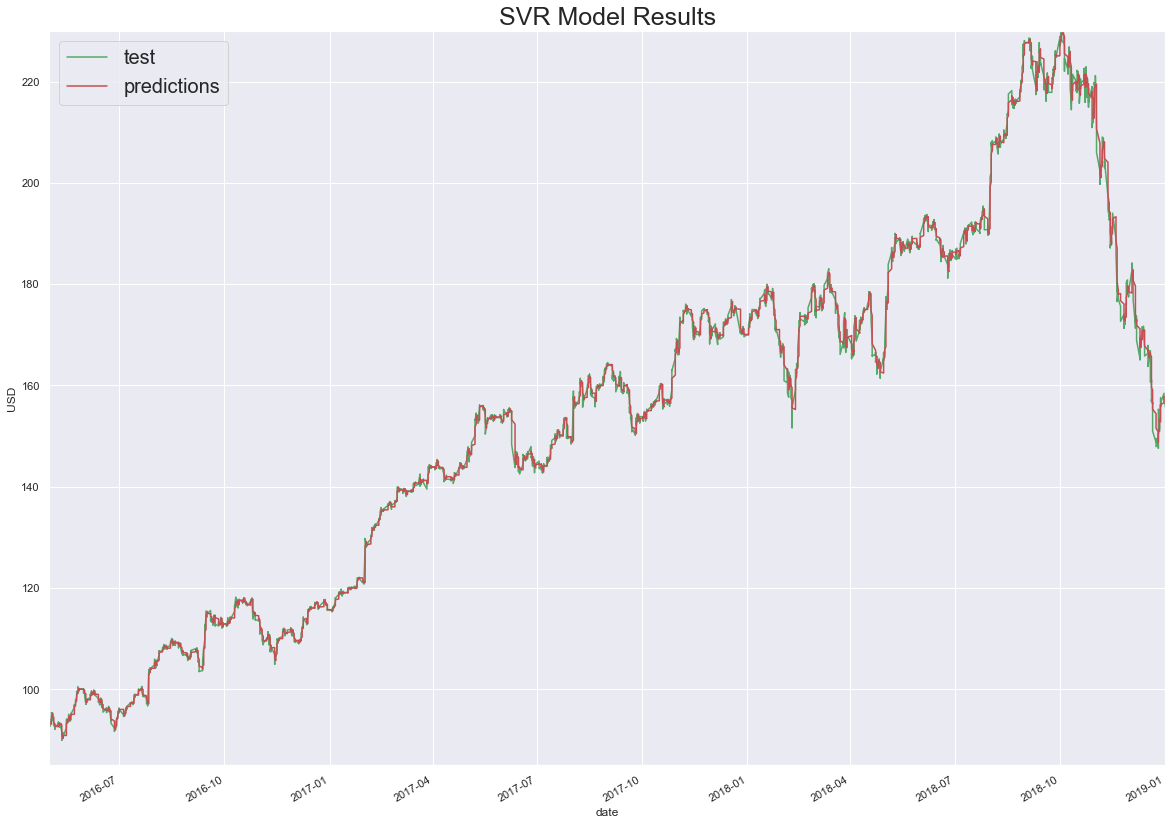

In [208]:
rcParams['figure.figsize'] = 20, 15 # width 10, height 8

est_df = pd.DataFrame({'est': test['est'], 
                   'DATE': test['DATE']})

ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True)
ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='r-', grid=True, ax=ax)
ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='DATE', y='est', style='r-', grid=True, ax=ax)
ax.legend(['test', 'predictions'])
ax.set_title('SVR Model Results', fontsize=25)
ax.set_xlabel("date")
ax.set_xlim(['2016-05', '2019'])
ax.set_ylim([85, 230])
ax.set_ylabel("USD")

In [209]:
print("RMSE:", rmse )
print("MAPE:", mape )
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

RMSE: 1.4675789063775684
MAPE: 0.601834021661554
MSE: 2.1537878464443794
MAE: 0.9351849094478174
R^2: 0.9983159886357889
